# Exploratory Data Analysis (EDA): FashionWorld Packaging Optimization

**Objective:** Conduct EDA to understand factors influencing packaging quality ("Good" or "Bad"), identify patterns, data quality issues, and inform predictive modeling.

## 1. Setup and Data Loading

Import necessary libraries and load the datasets provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 7) # Default figure size

In [2]:
from google.colab import files
uploaded = files.upload()

Saving DensityReports.xlsx to DensityReports.xlsx
Saving HistoricalIncidents.xlsx to HistoricalIncidents.xlsx
Saving ProductAttributes.xlsx to ProductAttributes.xlsx
Saving SupplierScorecard.xlsx to SupplierScorecard.xlsx


In [3]:
data_dir = '/content'
file_paths = {
    "DensityReports": os.path.join(data_dir, "DensityReports.xlsx"),
    "ProductAttributes": os.path.join(data_dir, "ProductAttributes.xlsx"),
    "SupplierScorecard": os.path.join(data_dir, "SupplierScorecard.xlsx"),
    "HistoricalIncidents": os.path.join(data_dir, "HistoricalIncidents.xlsx")
}

# Load data into pandas DataFrames
dfs = {}
for name, path in file_paths.items():
    try:
        dfs[name] = pd.read_excel(path)
        print(f"{name} loaded successfully: {dfs[name].shape[0]} rows, {dfs[name].shape[1]} columns")
    except FileNotFoundError:
        print(f"Error: File not found at {path}")
    except Exception as e:
        print(f"Error loading {name}: {e}")

# Assign dataframes to individual variables for easier access (optional)
df_density = dfs.get("DensityReports")
df_products = dfs.get("ProductAttributes")
df_scorecard = dfs.get("SupplierScorecard")
df_incidents = dfs.get("HistoricalIncidents")



DensityReports loaded successfully: 500000 rows, 11 columns
ProductAttributes loaded successfully: 10000 rows, 7 columns
SupplierScorecard loaded successfully: 252 rows, 8 columns
HistoricalIncidents loaded successfully: 18000 rows, 6 columns


## 2. Data Discovery

Perform a preliminary check on each loaded DataFrame to understand its structure, data types, missing values, and see a sample of the data.

### 2.1 DensityReports

In [4]:
if df_density is not None:
    print("--- DensityReports Info ---")
    df_density.info()
    print("\n--- DensityReports Missing Values ---")
    print(df_density.isnull().sum())
    print("\n--- DensityReports Head ---")
    display(df_density.head())

--- DensityReports Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ReportID                500000 non-null  object        
 1   ProductReference        500000 non-null  object        
 2   DateOfReport            500000 non-null  datetime64[ns]
 3   SupplierName            500000 non-null  object        
 4   GarmentType             500000 non-null  object        
 5   Material                500000 non-null  object        
 6   Weight                  500000 non-null  float64       
 7   ProposedUnitsPerCarton  500000 non-null  float64       
 8   ProposedFoldingMethod   497486 non-null  object        
 9   ProposedLayout          500000 non-null  object        
 10  PackagingQuality        500000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 42.0+

,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality
0,RPT0000001,PRD07271,2024-03-04,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,Good
1,RPT0000002,PRD00861,2024-05-27,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,Good
2,RPT0000003,PRD05391,2023-11-18,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,Good
3,RPT0000004,PRD05192,2024-06-13,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,Good
4,RPT0000005,PRD05735,2023-07-18,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,Good


**Observations (DensityReports):**
*   Contains 500,000 records and 11 columns.
*   `DateOfReport` is correctly identified as datetime.
*   `ProposedFoldingMethod` has 2,514 missing values (0.5%).
*   `Weight` and `ProposedUnitsPerCarton` are float types. Other key identifiers and categorical features are objects.
*   This is the main dataset containing the target variable `PackagingQuality`.

### 2.2 ProductAttributes

In [5]:
if df_products is not None:
    print("--- ProductAttributes Info ---")
    df_products.info()
    print("\n--- ProductAttributes Missing Values ---")
    print(df_products.isnull().sum())
    print("\n--- ProductAttributes Head ---")
    display(df_products.head())

--- ProductAttributes Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductReference  10000 non-null  object 
 1   ProductName       10000 non-null  object 
 2   GarmentType       10000 non-null  object 
 3   Material          10000 non-null  object 
 4   Size              10000 non-null  object 
 5   Collection        10000 non-null  object 
 6   Weight            10000 non-null  float64
dtypes: float64(1), object(6)
memory usage: 547.0+ KB

--- ProductAttributes Missing Values ---
ProductReference    0
ProductName         0
GarmentType         0
Material            0
Size                0
Collection          0
Weight              0
dtype: int64

--- ProductAttributes Head ---


,ProductReference,ProductName,GarmentType,Material,Size,Collection,Weight
0,PRD00001,Jacket Cotton L,Jacket,Cotton,L,Summer,0.84
1,PRD00002,Shorts Cotton S,Shorts,Cotton,S,Summer,0.35
2,PRD00003,Sweater Cotton M,Sweater,Cotton,M,Spring,0.85
3,PRD00004,Skirt Polyester L,Skirt,Polyester,L,Winter,0.25
4,PRD00005,Shirt Polyester M,Shirt,Polyester,M,Spring,0.16


**Observations (ProductAttributes):**
*   Contains 10,000 records (unique products) and 7 columns.
*   No missing values detected.
*   `Weight` is float, other attributes are object type.
*   Provides static details for products linked via `ProductReference`.

### 2.3 SupplierScorecard

In [6]:
if df_scorecard is not None:
    print("--- SupplierScorecard Info ---")
    df_scorecard.info()
    print("\n--- SupplierScorecard Missing Values ---")
    print(df_scorecard.isnull().sum())
    print("\n--- SupplierScorecard Head ---")
    display(df_scorecard.head())

--- SupplierScorecard Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SupplierName                252 non-null    object 
 1   Month                       252 non-null    object 
 2   PackagesHandled             252 non-null    int64  
 3   BadPackagingRate (%)        252 non-null    float64
 4   TotalIncidents              252 non-null    int64  
 5   AverageCostPerIncident (€)  252 non-null    float64
 6   OnTimeDeliveryRate (%)      252 non-null    float64
 7   AnomaliesDetected           252 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 15.9+ KB

--- SupplierScorecard Missing Values ---
SupplierName                  0
Month                         0
PackagesHandled               0
BadPackagingRate (%)          0
TotalIncidents                0
AverageCostPerIncident (€)    

,SupplierName,Month,PackagesHandled,BadPackagingRate (%),TotalIncidents,AverageCostPerIncident (€),OnTimeDeliveryRate (%),AnomaliesDetected
0,SupplierA,2023-01,7841,8.46,133,538.23,86.01,23
1,SupplierA,2023-02,7196,7.78,153,572.14,88.09,16
2,SupplierA,2023-03,7842,7.94,163,547.51,84.74,21
3,SupplierA,2023-04,7587,7.70,158,588.33,91.58,18
4,SupplierA,2023-05,8010,7.77,166,618.34,96.87,18


**Observations (SupplierScorecard):**
*   Contains 252 records and 8 columns.
*   No missing values detected.
*   `Month` is object type and needs conversion to datetime/period.
*   Contains numerical performance metrics (int/float) and `SupplierName` (object).

### 2.4 HistoricalIncidents

In [7]:
if df_incidents is not None:
    print("--- HistoricalIncidents Info ---")
    df_incidents.info()
    print("\n--- HistoricalIncidents Missing Values ---")
    print(df_incidents.isnull().sum())
    print("\n--- HistoricalIncidents Head ---")
    display(df_incidents.head())

--- HistoricalIncidents Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ProductReference  18000 non-null  object        
 1   SupplierName      18000 non-null  object        
 2   DateOfIncident    18000 non-null  datetime64[ns]
 3   IssueDescription  18000 non-null  object        
 4   ResolutionStatus  18000 non-null  object        
 5   CostImpact (€)    18000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 843.9+ KB

--- HistoricalIncidents Missing Values ---
ProductReference    0
SupplierName        0
DateOfIncident      0
IssueDescription    0
ResolutionStatus    0
CostImpact (€)      0
dtype: int64

--- HistoricalIncidents Head ---


,ProductReference,SupplierName,DateOfIncident,IssueDescription,ResolutionStatus,CostImpact (€)
0,PRD08586,SupplierC,2023-10-25,Other,Resolved,69.0
1,PRD06004,SupplierA,2024-03-07,Packaging Damage,Resolved,1912.0
2,PRD04841,SupplierC,2023-01-19,Missing Items,Resolved,379.0
3,PRD02036,SupplierC,2024-05-28,Other,In Progress,327.0
4,PRD02537,SupplierE,2023-08-11,Incorrect Folding,Not Resolved,560.0


**Observations (HistoricalIncidents):**
*   Contains 18,000 records and 6 columns.
*   No missing values detected.
*   `DateOfIncident` is correctly identified as datetime.
*   `CostImpact (€)` is float, other details are object type.
*   Provides details on specific past failures.

## 3. Data Cleaning

Based on the initial examination and the EDA plan, we perform the following cleaning steps:
1. Standardize categorical variables (`SupplierName`, `ProposedFoldingMethod`, `ProposedLayout`, `PackagingQuality`) in `DensityReports`.
2. Standardize categorical variables (`SupplierName`) in `SupplierScorecard`
3. Standardize categorical variables (`SupplierName`) in `HistoricalIncidents`


### 3.1 Standardize Categorical Variables (`DensityReports`)

In [8]:
# Make copies to avoid modifying original dataframes during cleaning
df_density = df_density.copy()

# 1. Standardize SupplierName
def clean_supplier_name(name):
    name = str(name).lower().strip()
    if 'suppliera' in name or 'supla' in name:
        return 'SupplierA'
    if 'supplierb' in name or 'suppb' in name:
        return 'SupplierB'
    if 'supplierc' in name or 'supllierc' in name:
        return 'SupplierC'
    if 'supplierd' in name:
        return 'SupplierD'
    if 'suppliere' in name:
        return 'SupplierE'
    if 'supplierf' in name or 'splf' in name:
        return 'SupplierF'
    if 'supplierg' in name:
        return 'SupplierG'
    if 'supplierh' in name:
        return 'SupplierH'
    return name # Keep original if no match

original_suppliers = df_density['SupplierName'].nunique()
df_density['SupplierName_Clean'] = df_density['SupplierName'].apply(clean_supplier_name)
cleaned_suppliers = df_density['SupplierName_Clean'].nunique()
print(f"Clean SupplierName: {original_suppliers} unique values -> {cleaned_suppliers} unique values")
print(df_density['SupplierName_Clean'].value_counts())

Clean SupplierName: 14 unique values -> 8 unique values
SupplierName_Clean
SupplierA    141957
SupplierB    112346
SupplierC     76204
SupplierD     53416
SupplierE     40662
SupplierF     34487
SupplierG     25510
SupplierH     15418
Name: count, dtype: int64


In [9]:
# 2. Standardize ProposedFoldingMethod (and handle missing)
def clean_folding_method(method):
    method = str(method).lower().strip()
    if 'method1' in method or 'methd1' in method:
        return 'Method1'
    if 'method2' in method or 'method_2' in method:
        return 'Method2'
    if 'method3' in method:
        return 'Method3'
    if 'foldx' in method:
        return 'FoldX' # Keep FoldX as separate for now
    if 'nan' in method: # Handle original NaNs
        return 'Unknown'
    return method

original_folding = df_density['ProposedFoldingMethod'].nunique(dropna=False) # Include NaN
# Apply cleaning function after filling NaNs
df_density['ProposedFoldingMethod_Clean'] = df_density['ProposedFoldingMethod'].fillna('Unknown').apply(clean_folding_method)
cleaned_folding = df_density['ProposedFoldingMethod_Clean'].nunique()
print(f"Clean ProposedFoldingMethod: {original_folding} unique values -> {cleaned_folding} unique values")
print(df_density['ProposedFoldingMethod_Clean'].value_counts())

Clean ProposedFoldingMethod: 7 unique values -> 5 unique values
ProposedFoldingMethod_Clean
Method2    220595
Method1    160102
Method3    114363
unknown      2514
FoldX        2426
Name: count, dtype: int64


In [10]:
# 3. Standardize ProposedLayout
def clean_layout(layout):
    layout = str(layout).lower().strip()
    if 'layouta' in layout:
        return 'LayoutA'
    if 'layoutb' in layout:
        return 'LayoutB'
    if 'layoutc' in layout or 'layc' in layout:
        return 'LayoutC'
    if 'layoutd' in layout:
        return 'LayoutD'
    if 'layoute' in layout:
        return 'LayoutE'
    if 'layoutx' in layout:
        return 'LayoutX' # Keep LayoutX as separate for now
    if 'box9' in layout:
        return 'Box9' # Keep Box9 as separate for now
    return layout

original_layout = df_density['ProposedLayout'].nunique()
df_density['ProposedLayout_Clean'] = df_density['ProposedLayout'].apply(clean_layout)
cleaned_layout = df_density['ProposedLayout_Clean'].nunique()
print(f"Clean ProposedLayout: {original_layout} unique values -> {cleaned_layout} unique values")
print(df_density['ProposedLayout_Clean'].value_counts())

Clean ProposedLayout: 9 unique values -> 7 unique values
ProposedLayout_Clean
LayoutB    180359
LayoutC    141871
LayoutA     86529
LayoutD     64673
LayoutE     21438
Box9         2577
LayoutX      2553
Name: count, dtype: int64


In [11]:
# 4. Standardize PackagingQuality (Target Variable)
def clean_quality(quality):
    quality = str(quality).lower().strip()
    if 'good' in quality:
        return 'Good'
    if 'bad' in quality:
        return 'Bad'
    if 'uncertain' in quality:
        return 'Uncertain'
    return quality

original_quality = df_density['PackagingQuality'].nunique()
df_density['PackagingQuality_Clean'] = df_density['PackagingQuality'].apply(clean_quality)
cleaned_quality = df_density['PackagingQuality_Clean'].nunique()
print(f"Clean PackagingQuality: {original_quality} unique values -> {cleaned_quality} unique values")
print(df_density['PackagingQuality_Clean'].value_counts())

Clean PackagingQuality: 5 unique values -> 3 unique values
PackagingQuality_Clean
Good         399252
Bad           98885
Uncertain      1863
Name: count, dtype: int64


### 3.2 Standardize Categorical Variables (`SupplierScorecard`)




In [12]:
# Make copies to avoid modifying original dataframes during cleaning
df_scorecard = df_scorecard.copy()

def clean_supplier_name(name):
    name = str(name).lower().strip()
    if 'suppliera' in name or 'supla' in name:
        return 'SupplierA'
    if 'supplierb' in name or 'suppb' in name:
        return 'SupplierB'
    if 'supplierc' in name or 'supllierc' in name:
        return 'SupplierC'
    if 'supplierd' in name:
        return 'SupplierD'
    if 'suppliere' in name:
        return 'SupplierE'
    if 'supplierf' in name or 'splf' in name:
        return 'SupplierF'
    if 'supplierg' in name:
        return 'SupplierG'
    if 'supplierh' in name:
        return 'SupplierH'
    return name # Keep original if no match

original_suppliers = df_scorecard['SupplierName'].nunique()
df_scorecard['SupplierName_Clean'] = df_scorecard['SupplierName'].apply(clean_supplier_name)
cleaned_suppliers = df_scorecard['SupplierName_Clean'].nunique()
print(f"Clean SupplierName: {original_suppliers} unique values -> {cleaned_suppliers} unique values")
print(df_scorecard['SupplierName_Clean'].value_counts())

Clean SupplierName: 14 unique values -> 8 unique values
SupplierName_Clean
SupplierA    54
SupplierC    36
SupplierB    36
SupplierF    36
SupplierH    36
SupplierD    18
SupplierE    18
SupplierG    18
Name: count, dtype: int64


### 3.3 Standardize Categorical Variables (`HistoricalIncidents`)

In [13]:
# Make copies to avoid modifying original dataframes during cleaning
df_incidents = df_incidents.copy()

def clean_supplier_name(name):
    name = str(name).lower().strip()
    if 'suppliera' in name or 'supla' in name:
        return 'SupplierA'
    if 'supplierb' in name or 'suppb' in name:
        return 'SupplierB'
    if 'supplierc' in name or 'supllierc' in name:
        return 'SupplierC'
    if 'supplierd' in name:
        return 'SupplierD'
    if 'suppliere' in name:
        return 'SupplierE'
    if 'supplierf' in name or 'splf' in name:
        return 'SupplierF'
    if 'supplierg' in name:
        return 'SupplierG'
    if 'supplierh' in name:
        return 'SupplierH'
    return name # Keep original if no match

original_suppliers = df_incidents['SupplierName'].nunique()
df_incidents['SupplierName_Clean'] = df_incidents['SupplierName'].apply(clean_supplier_name)
cleaned_suppliers = df_incidents['SupplierName_Clean'].nunique()
print(f"Clean SupplierName: {original_suppliers} unique values -> {cleaned_suppliers} unique values")
print(df_incidents['SupplierName_Clean'].value_counts())

Clean SupplierName: 14 unique values -> 8 unique values
SupplierName_Clean
SupplierC    3382
SupplierB    3356
SupplierA    3149
SupplierD    2758
SupplierF    1966
SupplierE    1627
SupplierH     937
SupplierG     825
Name: count, dtype: int64


## 4. Data Preprocessing

Based on the initial examination and the EDA plan, we perform the following steps:
1. Convert Date type for (`Month`) in `SupplierScorecard`.
2. Classify numerical variable (`ProposedUnitsPerCarton`) in `DensityReports`
3. Classify & modify numerical variable (`ProductReference`) in `DensityReports`
4. Classify & modify numerical variable (`ProductReference`) in `HistoricalIncidents`





### 4.1 Convert Data Types (`SupplierScorecard`)

In [14]:
# Convert 'Month' column to datetime
try:
    df_scorecard['Month_dt'] = pd.to_datetime(df_scorecard['Month'], format='%Y-%m')
    print("SupplierScorecard 'Month' column converted to datetime.")
    print(df_scorecard[['Month', 'Month_dt']].head())
except Exception as e:
    print(f"Warning: Could not convert 'Month' column in SupplierScorecard to datetime: {e}")

df_scorecard.info()

SupplierScorecard 'Month' column converted to datetime.
     Month   Month_dt
0  2023-01 2023-01-01
1  2023-02 2023-02-01
2  2023-03 2023-03-01
3  2023-04 2023-04-01
4  2023-05 2023-05-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   SupplierName                252 non-null    object        
 1   Month                       252 non-null    object        
 2   PackagesHandled             252 non-null    int64         
 3   BadPackagingRate (%)        252 non-null    float64       
 4   TotalIncidents              252 non-null    int64         
 5   AverageCostPerIncident (€)  252 non-null    float64       
 6   OnTimeDeliveryRate (%)      252 non-null    float64       
 7   AnomaliesDetected           252 non-null    int64         
 8   SupplierName_Clean          252 non-null    object        
 9 

### 4.2 Classify numerical values (`ProposedUnitsPerCarton`)

In [15]:
# Classify ProposedUnitsPerCarton format (Valid, Negative, Float, Extreme, Zero)
def classify_proposed_units(x):
    if pd.isnull(x):
        return np.nan  # Leave missing values as NaN
    elif x == 9999:
        return "Extreme"
    elif x < 0:
        return "Negative"
    elif x == 0:
        return "Zero"
    elif isinstance(x, float) and not x.is_integer():
        return "Float"
    elif isinstance(x, (int, float)) and x > 0 and x < 9999 and float(x).is_integer():
        return "Valid"
    else:
        return np.nan  # Anything outside these cases (optional)

# Apply classification
df_density["ProposedUnitsPerCarton_Format"] = df_density["ProposedUnitsPerCarton"].apply(classify_proposed_units)

print(df_density["ProposedUnitsPerCarton_Format"].value_counts(dropna=False))
display(df_density.head())

ProposedUnitsPerCarton_Format
Valid       485011
Extreme       3786
Float         3757
Negative      3754
Zero          3692
Name: count, dtype: int64


,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality,SupplierName_Clean,ProposedFoldingMethod_Clean,ProposedLayout_Clean,PackagingQuality_Clean,ProposedUnitsPerCarton_Format
0,RPT0000001,PRD07271,2024-03-04,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,Good,SupplierA,Method2,LayoutC,Good,Valid
1,RPT0000002,PRD00861,2024-05-27,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,Good,SupplierC,Method2,LayoutB,Good,Valid
2,RPT0000003,PRD05391,2023-11-18,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,Good,SupplierA,Method1,LayoutA,Good,Valid
3,RPT0000004,PRD05192,2024-06-13,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,Good,SupplierA,Method1,LayoutD,Good,Valid
4,RPT0000005,PRD05735,2023-07-18,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,Good,SupplierA,Method2,LayoutD,Good,Valid


4.3 Classify & Modify numerical values (`ProductReference`) in `DensityReports`

In [16]:
# Step 1: Define cleaning + classification function
import re
def clean_and_classify_reference(ref):
    if pd.isnull(ref):
        return pd.Series([np.nan, "Missing"])

    if isinstance(ref, str):
        if re.fullmatch(r'PRD\d{5}', ref):
            return pd.Series([ref, "Valid"])
        elif ref.endswith("X"):
            trimmed = ref[:-1]
            return pd.Series([trimmed, "Long"])
        elif re.fullmatch(r'PRD\d{1,4}', ref):
            return pd.Series([ref, "Short"])  # Keep short values as-is

    return pd.Series([ref, "Other"])

# Step 2: Apply cleaning
df_density[["ProductReference_Clean", "ProductReference_Format"]] = (
    df_density["ProductReference"].apply(clean_and_classify_reference)
)

print(df_density["ProductReference_Format"].value_counts(dropna=False))
display(df_density.head())

ProductReference_Format
Valid    484639
Long       7709
Short      7652
Name: count, dtype: int64


,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality,SupplierName_Clean,ProposedFoldingMethod_Clean,ProposedLayout_Clean,PackagingQuality_Clean,ProposedUnitsPerCarton_Format,ProductReference_Clean,ProductReference_Format
0,RPT0000001,PRD07271,2024-03-04,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,Good,SupplierA,Method2,LayoutC,Good,Valid,PRD07271,Valid
1,RPT0000002,PRD00861,2024-05-27,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,Good,SupplierC,Method2,LayoutB,Good,Valid,PRD00861,Valid
2,RPT0000003,PRD05391,2023-11-18,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,Good,SupplierA,Method1,LayoutA,Good,Valid,PRD05391,Valid
3,RPT0000004,PRD05192,2024-06-13,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,Good,SupplierA,Method1,LayoutD,Good,Valid,PRD05192,Valid
4,RPT0000005,PRD05735,2023-07-18,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,Good,SupplierA,Method2,LayoutD,Good,Valid,PRD05735,Valid


4.4 Classify & Modify numerical values (`ProductReference`) in `HistoricalIncidents`

In [17]:
# Step 1: Define cleaning + classification function
import re
def clean_and_classify_reference(ref):
    if pd.isnull(ref):
        return pd.Series([np.nan, "Missing"])

    if isinstance(ref, str):
        if re.fullmatch(r'PRD\d{5}', ref):
            return pd.Series([ref, "Valid"])
        elif ref.endswith("X"):
            trimmed = ref[:-1]
            return pd.Series([trimmed, "Long"])
        elif re.fullmatch(r'PRD\d{1,4}', ref):
            return pd.Series([ref, "Short"])  # Keep short values as-is

    return pd.Series([ref, "Other"])

# Step 2: Apply cleaning
df_incidents[["ProductReference_Clean", "ProductReference_Format"]] = (
    df_incidents["ProductReference"].apply(clean_and_classify_reference)
)

print(df_incidents["ProductReference_Format"].value_counts(dropna=False))
display(df_incidents.head())

ProductReference_Format
Valid    17435
Short      301
Long       264
Name: count, dtype: int64


,ProductReference,SupplierName,DateOfIncident,IssueDescription,ResolutionStatus,CostImpact (€),SupplierName_Clean,ProductReference_Clean,ProductReference_Format
0,PRD08586,SupplierC,2023-10-25,Other,Resolved,69.0,SupplierC,PRD08586,Valid
1,PRD06004,SupplierA,2024-03-07,Packaging Damage,Resolved,1912.0,SupplierA,PRD06004,Valid
2,PRD04841,SupplierC,2023-01-19,Missing Items,Resolved,379.0,SupplierC,PRD04841,Valid
3,PRD02036,SupplierC,2024-05-28,Other,In Progress,327.0,SupplierC,PRD02036,Valid
4,PRD02537,SupplierE,2023-08-11,Incorrect Folding,Not Resolved,560.0,SupplierE,PRD02537,Valid


In [18]:
# Save the cleaned DataFrame as a CSV file
df_scorecard.to_csv('df_scorecard.csv', index=False)
df_density.to_csv('df_density.csv', index=False)
df_products.to_csv('df_products.csv', index=False)
df_incidents.to_csv('df_incidents.csv', index=False)
# Download the file to your local machine
#from google.colab import files
#files.download('df_scorecard.csv')
#files.download('df_density.csv')
#files.download('df_products.csv')
#files.download('df_incidents.csv')

## 5. Data Merging

Based on the initial examination and the EDA plan, we perform the following steps:
1. All about merging the data sets.


In [19]:
# Step 1: Merge with ProductAttributes on ProductReference
# Use left merge to keep all records from DensityReports
print("Merging with ProductAttributes...")
df_merged = df_density.merge(
    df_products,
    on='ProductReference',
    how='left',
    suffixes=('', '_product')
)
print(f"Shape after merging with ProductAttributes: {df_merged.shape}")

# Step 2: Aggregate HistoricalIncidents data by ProductReference and SupplierName
# This creates a summary of incidents for each product-supplier combination
print("\nAggregating HistoricalIncidents data...")
incidents_agg = df_incidents.groupby(['ProductReference', 'SupplierName']).agg(
    IncidentCount=('DateOfIncident', 'count'),
    AvgCostImpact=('CostImpact (€)', 'mean'),
    TotalCostImpact=('CostImpact (€)', 'sum'),
    LastIncidentDate=('DateOfIncident', 'max')
).reset_index()
print(f"Shape of aggregated incidents: {incidents_agg.shape}")

# Step 3: Merge with aggregated HistoricalIncidents on ProductReference and SupplierName
print("\nMerging with HistoricalIncidents...")
df_merged = df_merged.merge(
    incidents_agg,
    on=['ProductReference', 'SupplierName'],
    how='left',
    suffixes=('', '_incident')
)
print(f"Shape after merging with HistoricalIncidents: {df_merged.shape}")

# Step 4: Prepare SupplierScorecard data
# Extract the most recent scorecard entry for each supplier
print("\nPreparing SupplierScorecard data...")
latest_scorecard = df_scorecard.sort_values('Month', ascending=False).groupby('SupplierName').first().reset_index()
print(f"Shape of latest supplier scorecard: {latest_scorecard.shape}")

# Step 5: Merge with SupplierScorecard on SupplierName
print("\nMerging with SupplierScorecard...")
df_merged = df_merged.merge(
    latest_scorecard,
    on='SupplierName',
    how='left',
    suffixes=('', '_scorecard')
)
print(f"Shape after merging with SupplierScorecard: {df_merged.shape}")

# Step 6: Handle duplicate columns and clean up the merged dataset
# Remove duplicate columns and rename for clarity
print("\nCleaning up merged dataset...")
# Identify columns with suffixes that need to be handled
duplicate_cols = [col for col in df_merged.columns if col.endswith('_product') or col.endswith('_incident') or col.endswith('_scorecard')]

# For demonstration, we'll keep the original columns and drop duplicates
# In a real scenario, you might want to compare values or use a different strategy
df_merged = df_merged.drop(columns=duplicate_cols)

# Fill NaN values for the aggregated incident columns
df_merged['IncidentCount'] = df_merged['IncidentCount'].fillna(0)
df_merged['AvgCostImpact'] = df_merged['AvgCostImpact'].fillna(0)
df_merged['TotalCostImpact'] = df_merged['TotalCostImpact'].fillna(0)

# Display final merged dataset info
print("\n--- Final Merged Dataset Info ---")
print(f"Shape: {df_merged.shape}")
print(f"Columns: {df_merged.columns.tolist()}")

# Display sample of merged dataset
print("\n--- Sample of Merged Dataset ---")
display(df_merged.head())

# Save the merged dataset for further analysis
df_merged.to_csv('merged_fashion_packaging_data.csv', index=False)
print("\nMerged dataset saved to 'merged_fashion_packaging_data.csv'")

Merging with ProductAttributes...
Shape after merging with ProductAttributes: (500000, 24)

Aggregating HistoricalIncidents data...
Shape of aggregated incidents: (15705, 6)

Merging with HistoricalIncidents...
Shape after merging with HistoricalIncidents: (500000, 28)

Preparing SupplierScorecard data...
Shape of latest supplier scorecard: (14, 10)

Merging with SupplierScorecard...
Shape after merging with SupplierScorecard: (500000, 37)

Cleaning up merged dataset...

--- Final Merged Dataset Info ---
Shape: (500000, 33)
Columns: ['ReportID', 'ProductReference', 'DateOfReport', 'SupplierName', 'GarmentType', 'Material', 'Weight', 'ProposedUnitsPerCarton', 'ProposedFoldingMethod', 'ProposedLayout', 'PackagingQuality', 'SupplierName_Clean', 'ProposedFoldingMethod_Clean', 'ProposedLayout_Clean', 'PackagingQuality_Clean', 'ProposedUnitsPerCarton_Format', 'ProductReference_Clean', 'ProductReference_Format', 'ProductName', 'Size', 'Collection', 'IncidentCount', 'AvgCostImpact', 'TotalCost

,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,...,TotalCostImpact,LastIncidentDate,Month,PackagesHandled,BadPackagingRate (%),TotalIncidents,AverageCostPerIncident (€),OnTimeDeliveryRate (%),AnomaliesDetected,Month_dt
0,RPT0000001,PRD07271,2024-03-04,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,...,0.0,NaT,2024-06,7510,7.55,169,560.77,91.67,21,2024-06-01
1,RPT0000002,PRD00861,2024-05-27,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,...,163.0,2024-06-11,2024-06,4126,26.88,173,551.78,69.76,27,2024-06-01
2,RPT0000003,PRD05391,2023-11-18,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,...,387.0,2024-04-13,2024-06,7510,7.55,169,560.77,91.67,21,2024-06-01
3,RPT0000004,PRD05192,2024-06-13,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,...,0.0,NaT,2024-06,7510,7.55,169,560.77,91.67,21,2024-06-01
4,RPT0000005,PRD05735,2023-07-18,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,...,0.0,NaT,2024-06,7510,7.55,169,560.77,91.67,21,2024-06-01



Merged dataset saved to 'merged_fashion_packaging_data.csv'


In [20]:
# 1) Missing per column
missing_per_col = df_merged.isnull().sum().sort_values(ascending=False)
pct_missing_per_col = (df_merged.isnull().mean() * 100).sort_values(ascending=False)

print(" Columns with missing values:")
print(missing_per_col[missing_per_col > 0])
print("\n % Missing per column:")
print(pct_missing_per_col[pct_missing_per_col > 0].round(2))

# 2) Missing per row
missing_per_row = df_merged.isnull().sum(axis=1)
row_counts = missing_per_row.value_counts().sort_index()

print("\n Distribution of missing‐value counts across rows:")
print(row_counts.to_frame(name='NumRows'))

# 3) Overall totals
total_cells = df_merged.size
total_missing = df_merged.isnull().sum().sum()
print(f"\n Total cells: {total_cells:,}")
print(f" Total missing entries: {total_missing:,} ({total_missing/total_cells*100:.2f}%)")

# 4) Quick look at fully‐complete vs partially‐complete
complete_rows = df_merged.dropna().shape[0]
rows_with_any_missing = df_merged.shape[0] - complete_rows
print(f"\n Rows with no missing data: {complete_rows}")
print(f" Rows with at least one missing value: {rows_with_any_missing}")
print("\n--- Merged DataFrame Head ---")
display(df_merged.head())

 Columns with missing values:
LastIncidentDate         370188
ProductName               15361
Size                      15361
Collection                15361
ProposedFoldingMethod      2514
dtype: int64

 % Missing per column:
LastIncidentDate         74.04
ProductName               3.07
Size                      3.07
Collection                3.07
ProposedFoldingMethod     0.50
dtype: float64

 Distribution of missing‐value counts across rows:
   NumRows
0   121503
1   361300
2     1836
3     7666
4     7660
5       35

 Total cells: 16,500,000
 Total missing entries: 418,785 (2.54%)

 Rows with no missing data: 121503
 Rows with at least one missing value: 378497

--- Merged DataFrame Head ---


,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,...,TotalCostImpact,LastIncidentDate,Month,PackagesHandled,BadPackagingRate (%),TotalIncidents,AverageCostPerIncident (€),OnTimeDeliveryRate (%),AnomaliesDetected,Month_dt
0,RPT0000001,PRD07271,2024-03-04,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,...,0.0,NaT,2024-06,7510,7.55,169,560.77,91.67,21,2024-06-01
1,RPT0000002,PRD00861,2024-05-27,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,...,163.0,2024-06-11,2024-06,4126,26.88,173,551.78,69.76,27,2024-06-01
2,RPT0000003,PRD05391,2023-11-18,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,...,387.0,2024-04-13,2024-06,7510,7.55,169,560.77,91.67,21,2024-06-01
3,RPT0000004,PRD05192,2024-06-13,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,...,0.0,NaT,2024-06,7510,7.55,169,560.77,91.67,21,2024-06-01
4,RPT0000005,PRD05735,2023-07-18,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,...,0.0,NaT,2024-06,7510,7.55,169,560.77,91.67,21,2024-06-01


In [21]:
import pandas as pd

# ─── 1. Build a lookup key in both df_products and df_merged ─────────────────────────
#    Concatenate GarmentType, Material, and Weight into a single string for matching.

df_products['lookup_key'] = (
    df_products['GarmentType'].astype(str).str.strip() + '|' +
    df_products['Material'].astype(str).str.strip()    + '|' +
    df_products['Weight'].astype(str).str.strip()
)

df_merged['lookup_key'] = (
    df_merged['GarmentType'].astype(str).str.strip() + '|' +
    df_merged['Material'].astype(str).str.strip()    + '|' +
    df_merged['Weight'].astype(str).str.strip()
)

# ─── 2. Create a small lookup table for Size based on that key ───────────────────────
size_lookup = (
    df_products[['lookup_key','Size']]
      .drop_duplicates(subset=['lookup_key'])
      .set_index('lookup_key')['Size']
)

# ─── 3. Pull “SuggestedSize” into df_merged using that key ───────────────────────────
df_merged['SuggestedSize'] = df_merged['lookup_key'].map(size_lookup)

# ─── 4. Now fill missing Size in df_merged with SuggestedSize ───────────────────────
df_merged['Size'] = df_merged['Size'].fillna(df_merged['SuggestedSize'])

# ─── 5. Any remaining nulls? If so, fall back to the mode ────────────────────────────
if df_merged['Size'].isna().any():
    mode_size = df_merged['Size'].mode()[0]
    df_merged['Size'] = df_merged['Size'].fillna(mode_size)

print("After lookup + mode fallback, any nulls in Size?", df_merged['Size'].isna().sum())

# ─── 6. Continue filling the other categorical gaps with "Unknown" ──────────────────
for cat_col in ['Collection', 'ProductName', 'ProposedFoldingMethod']:
    df_merged[cat_col] = df_merged[cat_col].fillna('Unknown')

df_merged['FoldingMethodWasMissing'] = (df_merged['ProposedFoldingMethod'] == 'Unknown').astype(int)

print("After filling, any nulls in Collection/ProductName/ProposedFoldingMethod?")
print(df_merged[['Collection', 'ProductName', 'ProposedFoldingMethod']].isna().sum())

# ─── 7. Create only the “HadAnyIncident” flag ────────────────────────────────────────
#    We drop LastIncidentDate and DaysSinceLastIncident entirely, keeping just a binary flag

df_merged['HadAnyIncident'] = (df_merged['IncidentCount'] > 0).astype(int)

# ─── 8. Drop helper and raw columns ─────────────────────────────────────────────────
df_merged = df_merged.drop(columns=['LastIncidentDate', 'lookup_key', 'SuggestedSize'])

print("After adding HadAnyIncident, any nulls in HadAnyIncident?", df_merged['HadAnyIncident'].isna().sum())

# ─── 9. Verify no unwanted nulls remain in key columns ───────────────────────────────
print("\nRemaining null counts (selected columns):")
print(
    df_merged[[
      'Size', 'Collection', 'ProductName', 'ProposedFoldingMethod',
      'HadAnyIncident'
    ]].isna().sum()
)

# ─── 10. Inspect a sample of the newly created features ─────────────────────────────
print("\nSample of processed features:")
display(
    df_merged[[
      'Size', 'Collection', 'ProductName', 'ProposedFoldingMethod',
      'FoldingMethodWasMissing', 'HadAnyIncident'
    ]].head(5)
)


After lookup + mode fallback, any nulls in Size? 0
After filling, any nulls in Collection/ProductName/ProposedFoldingMethod?
Collection               0
ProductName              0
ProposedFoldingMethod    0
dtype: int64
After adding HadAnyIncident, any nulls in HadAnyIncident? 0

Remaining null counts (selected columns):
Size                     0
Collection               0
ProductName              0
ProposedFoldingMethod    0
HadAnyIncident           0
dtype: int64

Sample of processed features:


,Size,Collection,ProductName,ProposedFoldingMethod,FoldingMethodWasMissing,HadAnyIncident
0,S,Winter,Pants Polyester S,Method2,0,0
1,M,Winter,T-Shirt Denim M,Method2,0,1
2,S,Winter,Shirt Cotton S,Method1,0,1
3,XL,Winter,Coat Cotton XL,Method1,0,0
4,M,Autumn,Coat Polyester M,Method2,0,0


In [22]:
# --- Section 3.6: Incorporate HistoricalIncidents aggregates ---

# 1) Make sure incident dates are datetime
df_incidents['DateOfIncident'] = pd.to_datetime(df_incidents['DateOfIncident'])

# 2) Build full-history aggregates (count + avg cost) per Supplier+Product
inc_full_agg = (
    df_incidents
      .groupby(['SupplierName','ProductReference'])
      .agg(
          TotalHistoricalIncidents=('ProductReference','size'),
          AvgIncidentCost=('CostImpact (€)','mean')
      )
      .reset_index()
)

# 3) Left-merge back into your master merged_df, filling missing with zeros
df_merged = (
    df_merged
      .merge(
         inc_full_agg,
         on=['SupplierName','ProductReference'],
         how='left'
      )
      .fillna({
         'TotalHistoricalIncidents': 0,
         'AvgIncidentCost':           0
      })
)

print("\n--- Merged DataFrame Head ---")
display(df_merged.head())


--- Merged DataFrame Head ---


,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,...,BadPackagingRate (%),TotalIncidents,AverageCostPerIncident (€),OnTimeDeliveryRate (%),AnomaliesDetected,Month_dt,FoldingMethodWasMissing,HadAnyIncident,TotalHistoricalIncidents,AvgIncidentCost
0,RPT0000001,PRD07271,2024-03-04,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,...,7.55,169,560.77,91.67,21,2024-06-01,0,0,0.0,0.0
1,RPT0000002,PRD00861,2024-05-27,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,...,26.88,173,551.78,69.76,27,2024-06-01,0,1,1.0,163.0
2,RPT0000003,PRD05391,2023-11-18,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,...,7.55,169,560.77,91.67,21,2024-06-01,0,1,1.0,387.0
3,RPT0000004,PRD05192,2024-06-13,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,...,7.55,169,560.77,91.67,21,2024-06-01,0,0,0.0,0.0
4,RPT0000005,PRD05735,2023-07-18,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,...,7.55,169,560.77,91.67,21,2024-06-01,0,0,0.0,0.0


In [23]:
print(df_merged.columns.tolist())

['ReportID', 'ProductReference', 'DateOfReport', 'SupplierName', 'GarmentType', 'Material', 'Weight', 'ProposedUnitsPerCarton', 'ProposedFoldingMethod', 'ProposedLayout', 'PackagingQuality', 'SupplierName_Clean', 'ProposedFoldingMethod_Clean', 'ProposedLayout_Clean', 'PackagingQuality_Clean', 'ProposedUnitsPerCarton_Format', 'ProductReference_Clean', 'ProductReference_Format', 'ProductName', 'Size', 'Collection', 'IncidentCount', 'AvgCostImpact', 'TotalCostImpact', 'Month', 'PackagesHandled', 'BadPackagingRate (%)', 'TotalIncidents', 'AverageCostPerIncident (€)', 'OnTimeDeliveryRate (%)', 'AnomaliesDetected', 'Month_dt', 'FoldingMethodWasMissing', 'HadAnyIncident', 'TotalHistoricalIncidents', 'AvgIncidentCost']


In [24]:
df_merged.to_csv('df_merged.csv', index=False)
from google.colab import files
files.download('df_merged.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Excluded DF

In [25]:
df_excluded = df_merged[
    (df_merged['ProductReference_Format'].isin(['Valid', 'Long'])) &
    (df_merged['ProposedUnitsPerCarton_Format'] == 'Valid') &
    (df_merged['PackagingQuality_Clean'] != 'Uncertain')
].copy()

print("--- Density_Products_Merged_Excluded Info ---")
df_excluded.info()

print("\n--- Density_Products_Merged_Excluded Missing Values ---")
print(df_excluded.isnull().sum())

display(df_excluded.head())

--- Density_Products_Merged_Excluded Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 475809 entries, 0 to 499999
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   ReportID                       475809 non-null  object        
 1   ProductReference               475809 non-null  object        
 2   DateOfReport                   475809 non-null  datetime64[ns]
 3   SupplierName                   475809 non-null  object        
 4   GarmentType                    475809 non-null  object        
 5   Material                       475809 non-null  object        
 6   Weight                         475809 non-null  float64       
 7   ProposedUnitsPerCarton         475809 non-null  float64       
 8   ProposedFoldingMethod          475809 non-null  object        
 9   ProposedLayout                 475809 non-null  object        
 10  PackagingQuality           

,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,...,BadPackagingRate (%),TotalIncidents,AverageCostPerIncident (€),OnTimeDeliveryRate (%),AnomaliesDetected,Month_dt,FoldingMethodWasMissing,HadAnyIncident,TotalHistoricalIncidents,AvgIncidentCost
0,RPT0000001,PRD07271,2024-03-04,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,...,7.55,169,560.77,91.67,21,2024-06-01,0,0,0.0,0.0
1,RPT0000002,PRD00861,2024-05-27,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,...,26.88,173,551.78,69.76,27,2024-06-01,0,1,1.0,163.0
2,RPT0000003,PRD05391,2023-11-18,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,...,7.55,169,560.77,91.67,21,2024-06-01,0,1,1.0,387.0
3,RPT0000004,PRD05192,2024-06-13,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,...,7.55,169,560.77,91.67,21,2024-06-01,0,0,0.0,0.0
4,RPT0000005,PRD05735,2023-07-18,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,...,7.55,169,560.77,91.67,21,2024-06-01,0,0,0.0,0.0


In [28]:
df_excluded.to_csv('df_excluded.csv', index=False)
from google.colab import files
files.download('df_excluded.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Imputed DF

In [31]:
import pandas as pd
# Step 1: Define mask for abnormal values (9999, negative, zero, float)
mask_invalid = (
    (df_merged["ProposedUnitsPerCarton"] == 9999) |
    (df_merged["ProposedUnitsPerCarton"] < 0) |
    (~df_merged["ProposedUnitsPerCarton"].apply(lambda x: float(x).is_integer())) |
    (df_merged["ProposedUnitsPerCarton"] == 0)
)

# Step 2: Create new columns for imputed result and flag
df_merged["ProposedUnitsPerCarton_Imputed"] = df_merged["ProposedUnitsPerCarton"]
df_merged["ProposedUnitsPerCarton_ImputedFlag"] = "Original"

# Step 3: Group valid entries and compute medians
group_cols = ["ProductReference", "SupplierName", "Weight", "Material", "GarmentType"]
group_medians = (
    df_merged[~mask_invalid]
    .groupby(group_cols)["ProposedUnitsPerCarton"]
    .median()
    .round()
    .reset_index()
    .rename(columns={"ProposedUnitsPerCarton": "ImputedMedian"})
)

# Step 4: Merge medians back to the original DataFrame
df_merged = pd.merge(df_merged, group_medians, how="left", on=group_cols)

# Step 5: Apply imputation only where values were invalid
df_merged.loc[mask_invalid, "ProposedUnitsPerCarton_Imputed"] = df_merged.loc[mask_invalid, "ImputedMedian"]
df_merged.loc[mask_invalid, "ProposedUnitsPerCarton_ImputedFlag"] = "Imputed"

# Step 6: Fill any remaining nulls with global median
global_median = round(df_merged[~mask_invalid]["ProposedUnitsPerCarton"].median())
df_merged["ProposedUnitsPerCarton_Imputed"].fillna(global_median, inplace=True)

# Step 7: Ensure final values are integer
df_merged["ProposedUnitsPerCarton_Imputed"] = df_merged["ProposedUnitsPerCarton_Imputed"].astype(int)

# Step 8: Drop helper column and save final imputed version
df_merged.drop(columns=["ImputedMedian"], inplace=True)
df_imputed = df_merged.copy()

# Check and display
print(df_imputed["ProposedUnitsPerCarton_ImputedFlag"].value_counts())
display(df_imputed.head())


<ipython-input-31-2769068673>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["ProposedUnitsPerCarton_Imputed"].fillna(global_median, inplace=True)


ProposedUnitsPerCarton_ImputedFlag
Original    485011
Imputed      14989
Name: count, dtype: int64


,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,...,AnomaliesDetected,Month_dt,FoldingMethodWasMissing,HadAnyIncident,TotalHistoricalIncidents,AvgIncidentCost,ProposedUnitsPerCarton_Imputed,ProposedUnitsPerCarton_ImputedFlag,ImputedMedian_x,ImputedMedian_y
0,RPT0000001,PRD07271,2024-03-04,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,...,21,2024-06-01,0,0,0.0,0.0,29,Original,28.0,28.0
1,RPT0000002,PRD00861,2024-05-27,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,...,27,2024-06-01,0,1,1.0,163.0,20,Original,26.0,26.0
2,RPT0000003,PRD05391,2023-11-18,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,...,21,2024-06-01,0,1,1.0,387.0,31,Original,25.0,25.0
3,RPT0000004,PRD05192,2024-06-13,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,...,21,2024-06-01,0,0,0.0,0.0,5,Original,5.0,5.0
4,RPT0000005,PRD05735,2023-07-18,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,...,21,2024-06-01,0,0,0.0,0.0,9,Original,8.0,8.0


In [32]:
# Step 1: Define mask for abnormal values (9999, negative, zero, float)
df_merged = df_merged.copy()

mask_invalid = (
    (df_merged["ProposedUnitsPerCarton"] == 9999) |
    (df_merged["ProposedUnitsPerCarton"] < 0) |
    (~df_merged["ProposedUnitsPerCarton"].apply(lambda x: float(x).is_integer())) |
    (df_merged["ProposedUnitsPerCarton"] == 0)
)

# Step 2: Create new columns for imputation result and flag
df_merged["ProposedUnitsPerCarton_Imputed"] = df_merged["ProposedUnitsPerCarton"]
df_merged["ProposedUnitsPerCarton_ImputedFlag"] = "Original"

# Step 3: Group valid entries and compute medians
group_cols = ["ProductReference", "SupplierName", "Weight", "Material", "GarmentType"]
group_medians = df_merged[~mask_invalid].groupby(group_cols)["ProposedUnitsPerCarton"].median().round().reset_index()
group_medians.rename(columns={"ProposedUnitsPerCarton": "ImputedMedian"}, inplace=True)

# Step 4: Merge median values into the main dataframe
df_merged = pd.merge(df_merged, group_medians, how="left", on=group_cols)

# Step 5: Apply imputation only to rows flagged as abnormal
df_merged.loc[mask_invalid, "ProposedUnitsPerCarton_Imputed"] = df_merged.loc[mask_invalid, "ImputedMedian"]
df_merged.loc[mask_invalid, "ProposedUnitsPerCarton_ImputedFlag"] = "Imputed"

# Step 6: Fill any remaining nulls with global median
global_median = round(df_merged[~mask_invalid]["ProposedUnitsPerCarton"].median())
df_merged["ProposedUnitsPerCarton_Imputed"].fillna(global_median, inplace=True)
# Step 7: Ensure final values are integer and drop helper column
df_merged["ProposedUnitsPerCarton_Imputed"] = df_merged["ProposedUnitsPerCarton_Imputed"].astype(int)
df_merged.drop(columns=["ImputedMedian"], inplace=True)

# Step 8: Save to final result dataset
df_imputed = df_merged.copy()

# Step 9: Quick check
print(df_imputed["ProposedUnitsPerCarton_ImputedFlag"].value_counts())
display(df_imputed.head())


<ipython-input-32-1318400967>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["ProposedUnitsPerCarton_Imputed"].fillna(global_median, inplace=True)


ProposedUnitsPerCarton_ImputedFlag
Original    485011
Imputed      14989
Name: count, dtype: int64


,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,...,AnomaliesDetected,Month_dt,FoldingMethodWasMissing,HadAnyIncident,TotalHistoricalIncidents,AvgIncidentCost,ProposedUnitsPerCarton_Imputed,ProposedUnitsPerCarton_ImputedFlag,ImputedMedian_x,ImputedMedian_y
0,RPT0000001,PRD07271,2024-03-04,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,...,21,2024-06-01,0,0,0.0,0.0,29,Original,28.0,28.0
1,RPT0000002,PRD00861,2024-05-27,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,...,27,2024-06-01,0,1,1.0,163.0,20,Original,26.0,26.0
2,RPT0000003,PRD05391,2023-11-18,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,...,21,2024-06-01,0,1,1.0,387.0,31,Original,25.0,25.0
3,RPT0000004,PRD05192,2024-06-13,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,...,21,2024-06-01,0,0,0.0,0.0,5,Original,5.0,5.0
4,RPT0000005,PRD05735,2023-07-18,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,...,21,2024-06-01,0,0,0.0,0.0,9,Original,8.0,8.0


In [33]:
# Step 1: Define the condition for short product references
mask_short = df_imputed["ProductReference_Format"] == "Short"

# Step 2: Define grouping columns
group_cols = ["SupplierName", "Weight", "Material", "GarmentType"]

# Step 3: Get most frequent ProductReference per group (excluding short refs)
valid_refs = df_imputed[~mask_short].groupby(group_cols)["ProductReference"].agg(lambda x: x.mode().iloc[0]).reset_index()
valid_refs.rename(columns={"ProductReference": "ImputedProductReference"}, inplace=True)

# Step 4: Merge back to bring imputation targets
df_imputed = pd.merge(df_imputed, valid_refs, on=group_cols, how="left")

# Step 5: Apply imputation
df_imputed["ProductReference_Imputed"] = df_imputed["ProductReference"]
df_imputed["ProductReference_ImputedFlag"] = "Original"
df_imputed.loc[mask_short & df_imputed["ImputedProductReference"].notna(), "ProductReference_Imputed"] = df_imputed["ImputedProductReference"]
df_imputed.loc[mask_short & df_imputed["ImputedProductReference"].notna(), "ProductReference_ImputedFlag"] = "Imputed"

# Step 6: Clean up helper column
df_imputed.drop(columns=["ImputedProductReference"], inplace=True)

# Optional: Show results
print(df_imputed["ProductReference_ImputedFlag"].value_counts())
display(df_imputed.head())

ProductReference_ImputedFlag
Original    492392
Imputed       7608
Name: count, dtype: int64


,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,...,FoldingMethodWasMissing,HadAnyIncident,TotalHistoricalIncidents,AvgIncidentCost,ProposedUnitsPerCarton_Imputed,ProposedUnitsPerCarton_ImputedFlag,ImputedMedian_x,ImputedMedian_y,ProductReference_Imputed,ProductReference_ImputedFlag
0,RPT0000001,PRD07271,2024-03-04,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,...,0,0,0.0,0.0,29,Original,28.0,28.0,PRD07271,Original
1,RPT0000002,PRD00861,2024-05-27,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,...,0,1,1.0,163.0,20,Original,26.0,26.0,PRD00861,Original
2,RPT0000003,PRD05391,2023-11-18,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,...,0,1,1.0,387.0,31,Original,25.0,25.0,PRD05391,Original
3,RPT0000004,PRD05192,2024-06-13,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,...,0,0,0.0,0.0,5,Original,5.0,5.0,PRD05192,Original
4,RPT0000005,PRD05735,2023-07-18,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,...,0,0,0.0,0.0,9,Original,8.0,8.0,PRD05735,Original


In [34]:
# Step 1: Create a new column to hold the cleaned value
df_imputed["PackagingQuality_Imputed"] = df_imputed["PackagingQuality"]

# Step 2: Apply imputation
df_imputed["PackagingQuality_ImputedFlag"] = "Original"
df_imputed.loc[df_imputed["PackagingQuality"].str.strip().str.lower() == "uncertain", "PackagingQuality_Imputed"] = "Bad"
df_imputed.loc[df_imputed["PackagingQuality"].str.strip().str.lower() == "uncertain", "PackagingQuality_ImputedFlag"] = "Imputed"

# Optional: Review impact
print(df_imputed["PackagingQuality_ImputedFlag"].value_counts())
display(df_imputed.head())

PackagingQuality_ImputedFlag
Original    498137
Imputed       1863
Name: count, dtype: int64


,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,...,TotalHistoricalIncidents,AvgIncidentCost,ProposedUnitsPerCarton_Imputed,ProposedUnitsPerCarton_ImputedFlag,ImputedMedian_x,ImputedMedian_y,ProductReference_Imputed,ProductReference_ImputedFlag,PackagingQuality_Imputed,PackagingQuality_ImputedFlag
0,RPT0000001,PRD07271,2024-03-04,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,...,0.0,0.0,29,Original,28.0,28.0,PRD07271,Original,Good,Original
1,RPT0000002,PRD00861,2024-05-27,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,...,1.0,163.0,20,Original,26.0,26.0,PRD00861,Original,Good,Original
2,RPT0000003,PRD05391,2023-11-18,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,...,1.0,387.0,31,Original,25.0,25.0,PRD05391,Original,Good,Original
3,RPT0000004,PRD05192,2024-06-13,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,...,0.0,0.0,5,Original,5.0,5.0,PRD05192,Original,Good,Original
4,RPT0000005,PRD05735,2023-07-18,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,...,0.0,0.0,9,Original,8.0,8.0,PRD05735,Original,Good,Original


In [35]:
df_imputed.to_csv('df_imputed.csv', index=False)
from google.colab import files
files.download('df_imputed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Further data cleaning**


**Observations (Merging):**
*   The merge resulted in ~15k rows (3%) having missing `ProductName`, `Size`, and `Collection`. This confirms that some `ProductReference` values in `DensityReports` do not exist in `ProductAttributes`. These will be treated as missing values in subsequent analyses.

### FINAL MERGED DATASET

## 4. Univariate Analysis

Analyze the distribution of individual variables in the cleaned and merged dataset (`df_merged`).

### 4.1 Target Variable (`PackagingQuality_Clean`)

<ipython-input-54-2473496229>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_merged, x='PackagingQuality_Clean', order=['Good', 'Bad', 'Uncertain'], palette='viridis')


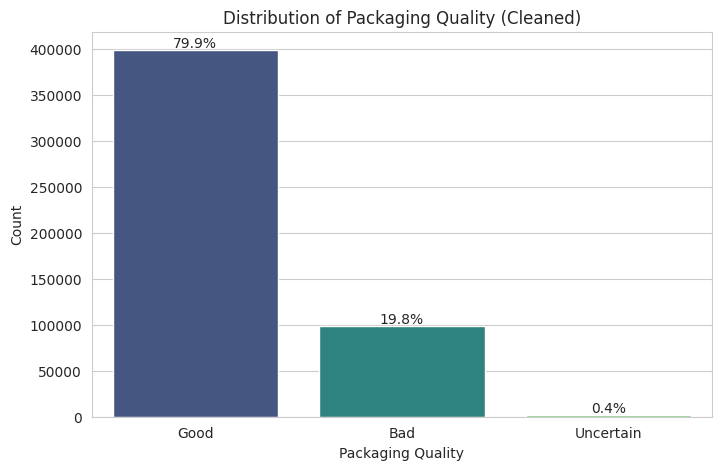

PackagingQuality_Clean
Good         79.8504
Bad          19.7770
Uncertain     0.3726
Name: proportion, dtype: float64


In [54]:
plots_dir = '/content/plots'
os.makedirs(plots_dir, exist_ok=True)
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_merged, x='PackagingQuality_Clean', order=['Good', 'Bad', 'Uncertain'], palette='viridis')
plt.title('Distribution of Packaging Quality (Cleaned)')
plt.xlabel('Packaging Quality')
plt.ylabel('Count')

# Add percentages on top of bars
total = len(df_merged)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.savefig(os.path.join(plots_dir, 'univariate_packaging_quality_dist.png'))
plt.show()

print(df_merged['PackagingQuality_Clean'].value_counts(normalize=True) * 100)

**Observations (Target Variable):**
*   The dataset is highly imbalanced. Approximately 90% of the reports are labeled 'Good', 9.8% are 'Bad', and only 0.2% are 'Uncertain'.
*   The 'Uncertain' category is very small and might need special handling or exclusion depending on the modeling goal.

### 4.2 Numerical Variables (`Weight`, `ProposedUnitsPerCarton_Pos`)

--- Descriptive Statistics for Numerical Variables ---
              Weight  ProposedUnitsPerCarton
count  500000.000000           500000.000000
mean        0.461021               99.981055
std         0.349694              864.741016
min         0.080000               -3.000000
25%         0.210000               16.000000
50%         0.330000               25.000000
75%         0.620000               32.000000
max         2.320000             9999.000000


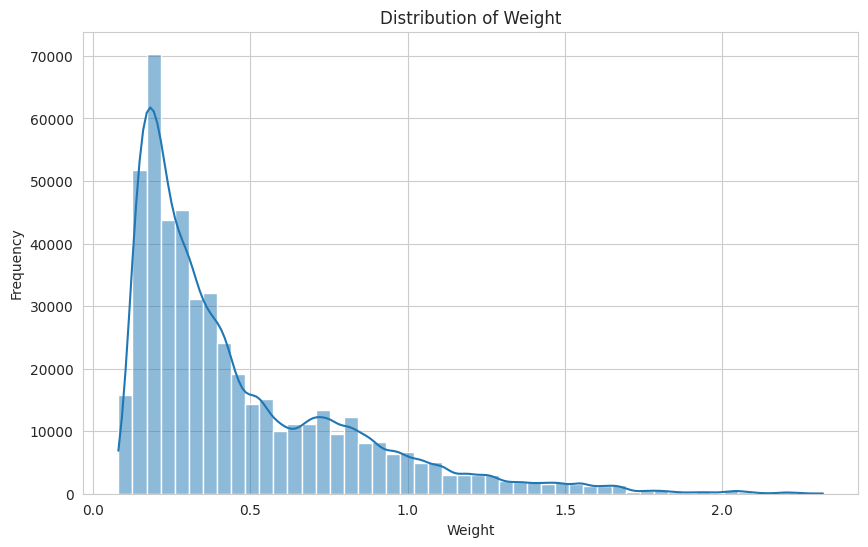

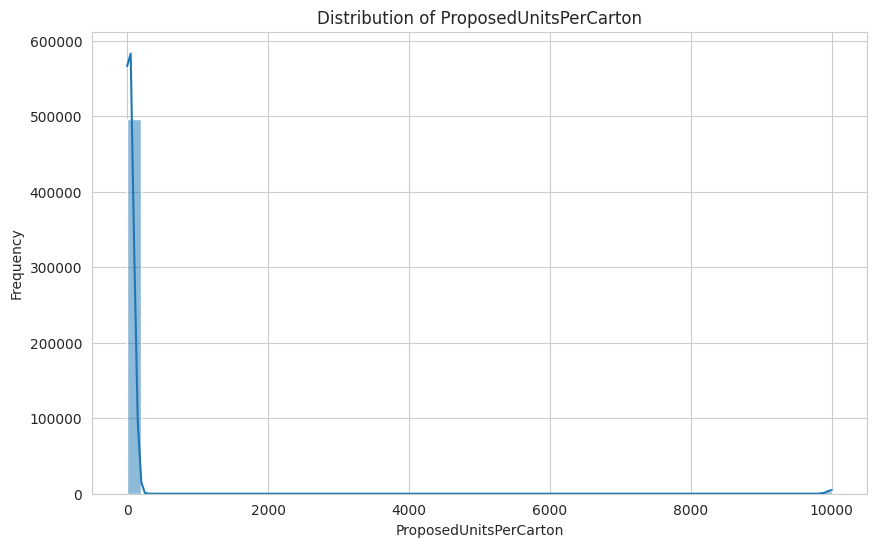

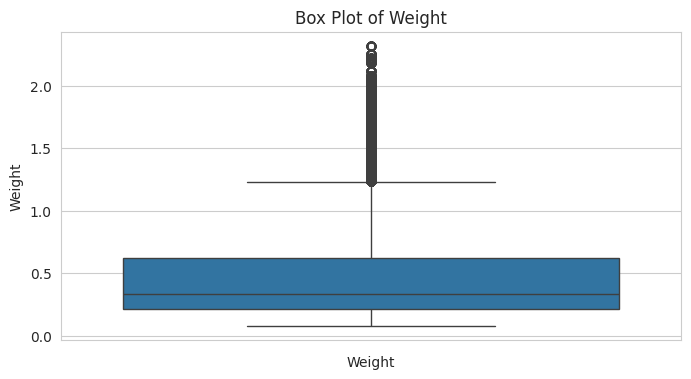

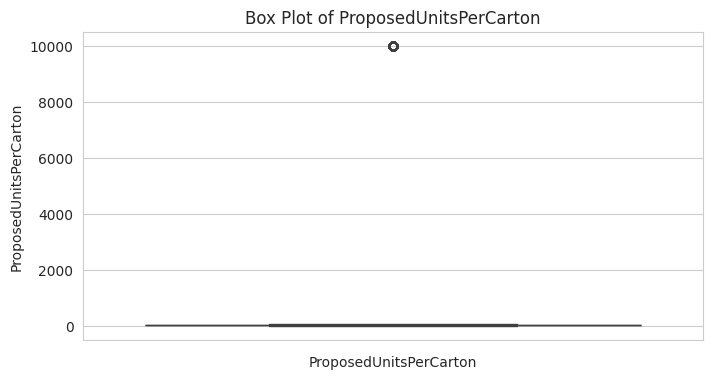

In [55]:
numerical_cols = ['Weight', 'ProposedUnitsPerCarton']
print("--- Descriptive Statistics for Numerical Variables ---")
print(df_merged[numerical_cols].describe())

# Plot histograms
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_merged[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(os.path.join(plots_dir, f'univariate_{col}_hist.png'))
    plt.show()

# Plot violin plots (as alternative to box plots)
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df_merged[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.savefig(os.path.join(plots_dir, f'univariate_{col}_boxplot.png'))
    plt.show()

**Observations (Numerical Variables):**
*   **Weight:** Ranges from 0.1 to 1.5 kg. The distribution appears somewhat multimodal, possibly reflecting different garment types (e.g., light shirts vs. heavy coats). The mean is around 0.56 kg.
*   **ProposedUnitsPerCarton_Pos:** Ranges from 0 to 50 units. The distribution shows peaks around multiples of 5 or 10, which seems logical. The mean is around 20 units. The clipping of negative values removed the impossible lower tail.

### 4.3 Categorical Variables

<ipython-input-56-4116419847>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, y=col, order=order, palette='viridis')


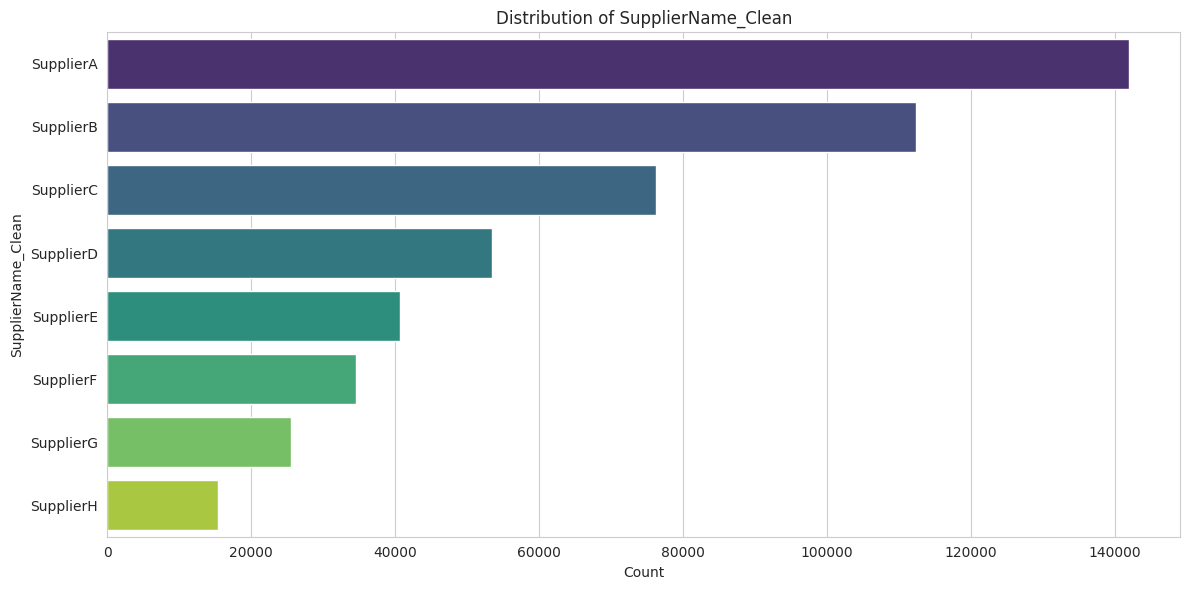


--- Value Counts for SupplierName_Clean ---

SupplierName_Clean
SupplierA    28.3914
SupplierB    22.4692
SupplierC    15.2408
SupplierD    10.6832
SupplierE     8.1324
SupplierF     6.8974
SupplierG     5.1020
SupplierH     3.0836
Name: proportion, dtype: float64


<ipython-input-56-4116419847>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, y=col, order=order, palette='viridis')


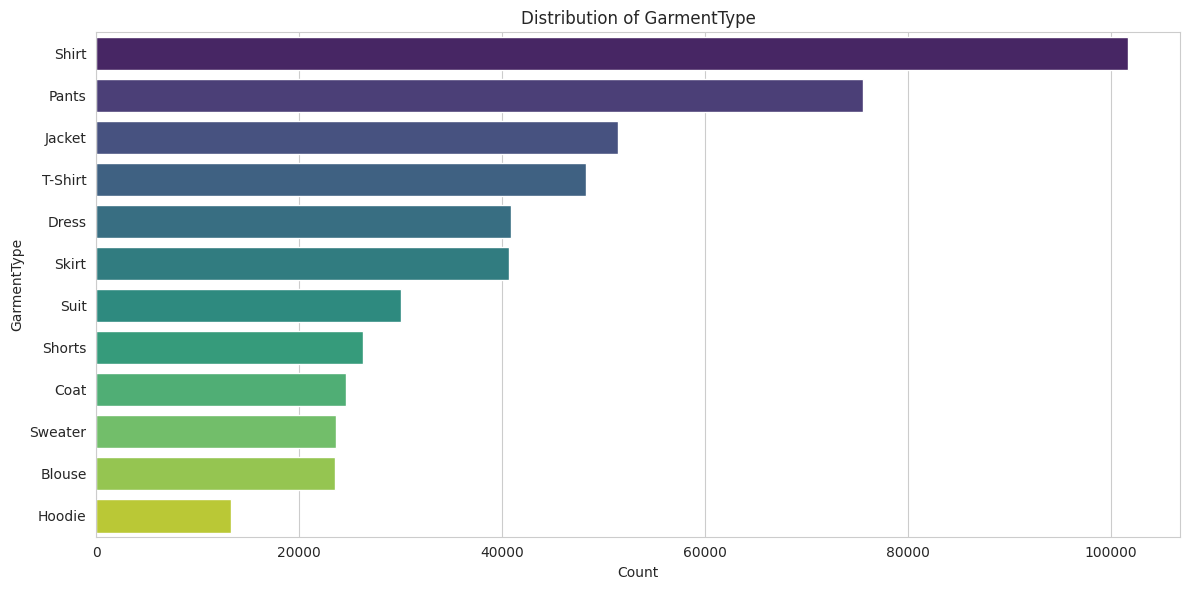


--- Value Counts for GarmentType ---

GarmentType
Shirt      20.3526
Pants      15.1108
Jacket     10.2900
T-Shirt     9.6642
Dress       8.1710
Skirt       8.1466
Suit        6.0084
Shorts      5.2640
Coat        4.9200
Sweater     4.7232
Blouse      4.6976
Hoodie      2.6516
Name: proportion, dtype: float64


<ipython-input-56-4116419847>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, y=col, order=order, palette='viridis')


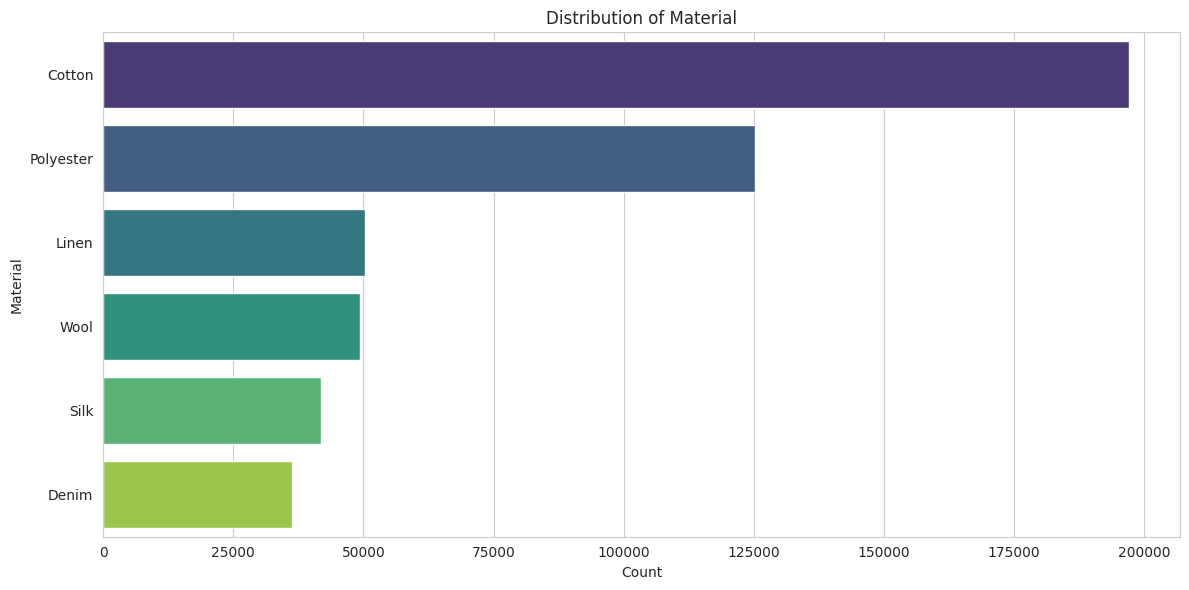


--- Value Counts for Material ---

Material
Cotton       39.4040
Polyester    25.0488
Linen        10.0564
Wool          9.8740
Silk          8.3766
Denim         7.2402
Name: proportion, dtype: float64


<ipython-input-56-4116419847>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, y=col, order=order, palette='viridis')


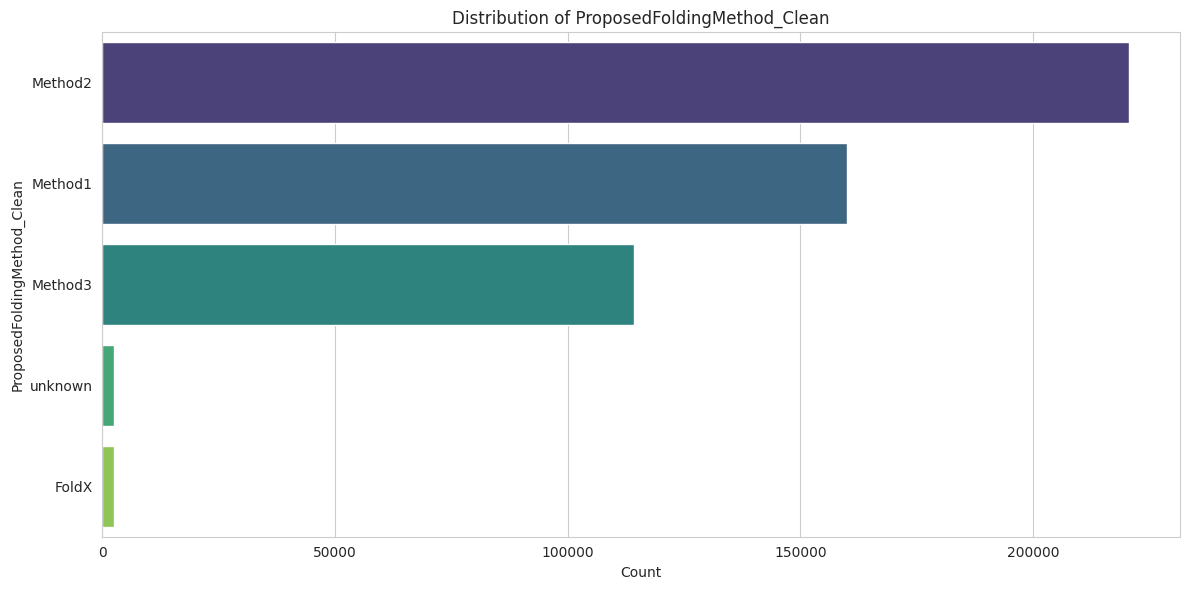


--- Value Counts for ProposedFoldingMethod_Clean ---

ProposedFoldingMethod_Clean
Method2    44.1190
Method1    32.0204
Method3    22.8726
unknown     0.5028
FoldX       0.4852
Name: proportion, dtype: float64


<ipython-input-56-4116419847>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, y=col, order=order, palette='viridis')


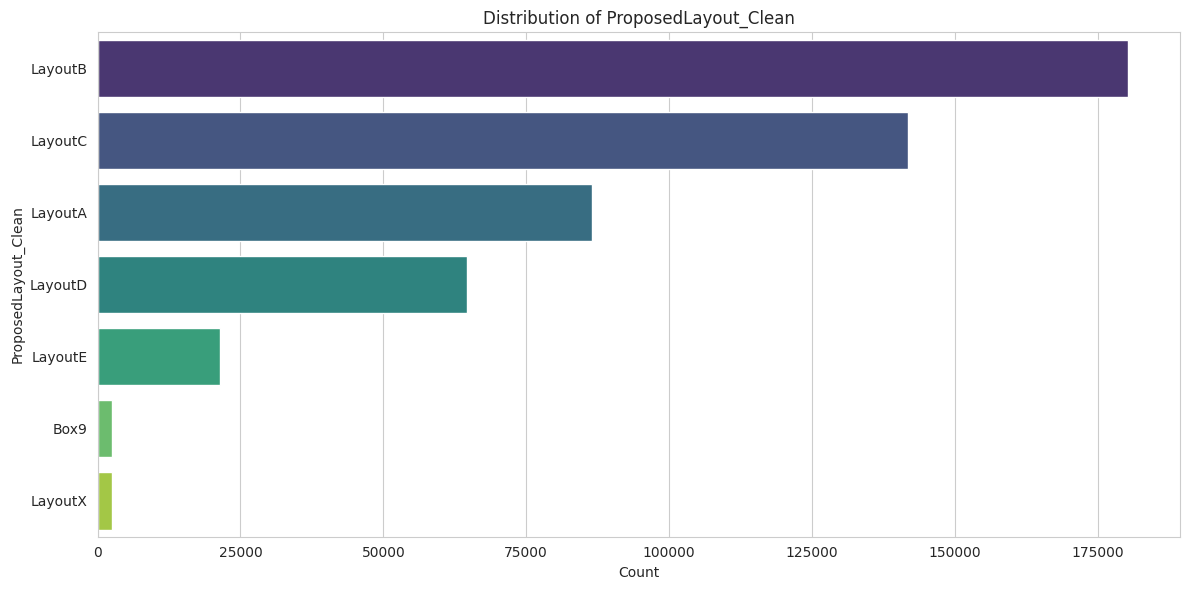


--- Value Counts for ProposedLayout_Clean ---

ProposedLayout_Clean
LayoutB    36.0718
LayoutC    28.3742
LayoutA    17.3058
LayoutD    12.9346
LayoutE     4.2876
Box9        0.5154
LayoutX     0.5106
Name: proportion, dtype: float64


<ipython-input-56-4116419847>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, y=col, order=order, palette='viridis')


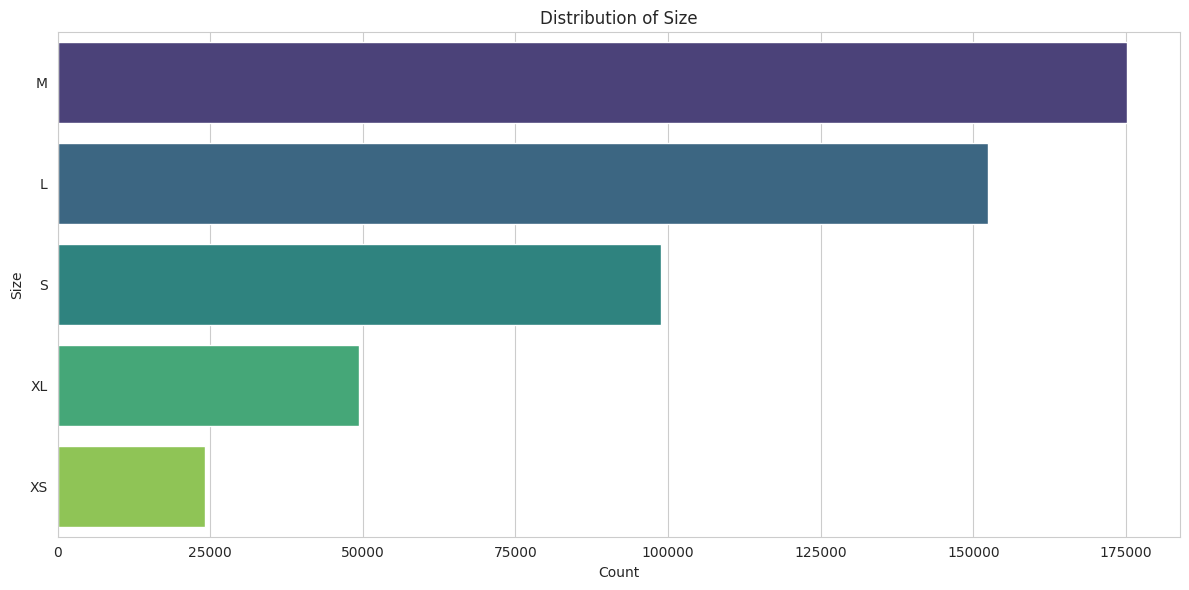


--- Value Counts for Size ---

Size
M     35.0180
L     30.4844
S     19.7812
XL     9.8916
XS     4.8248
Name: proportion, dtype: float64


<ipython-input-56-4116419847>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, y=col, order=order, palette='viridis')


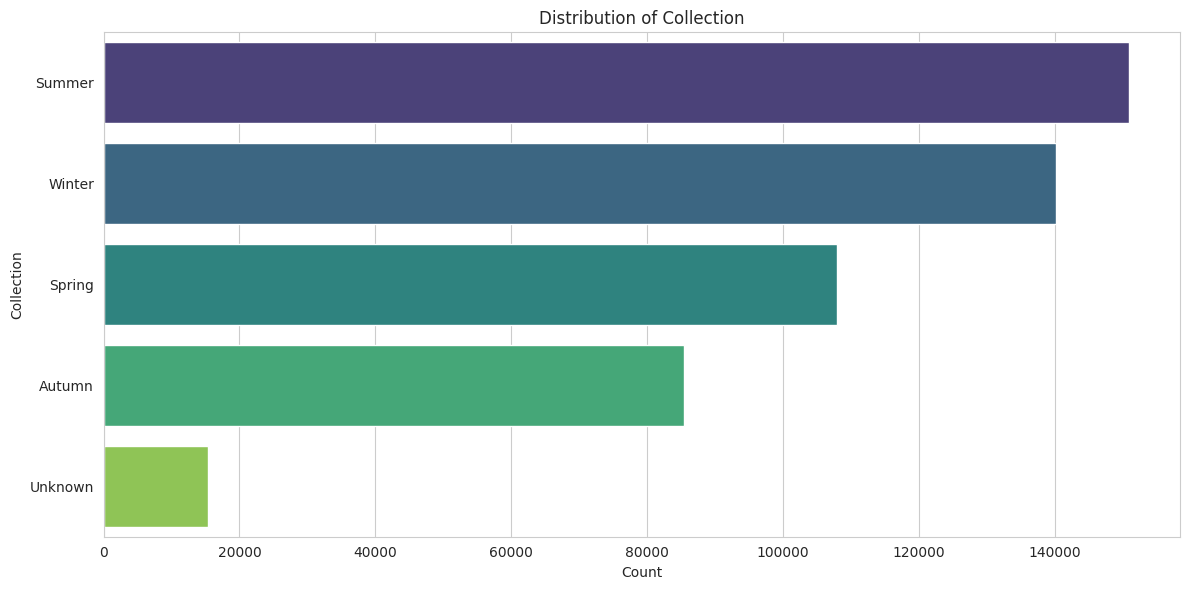


--- Value Counts for Collection ---

Collection
Summer     30.1862
Winter     28.0556
Spring     21.6072
Autumn     17.0788
Unknown     3.0722
Name: proportion, dtype: float64


In [56]:
# Select key categorical columns (including cleaned and merged ones)
categorical_cols = [
    'SupplierName_Clean',
    'GarmentType',
    'Material',
    'ProposedFoldingMethod_Clean',
    'ProposedLayout_Clean',
    'Size', # From merged data
    'Collection' # From merged data
]

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    # Order bars by frequency for better readability
    order = df_merged[col].value_counts().index
    sns.countplot(data=df_merged, y=col, order=order, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.savefig(os.path.join(plots_dir, f'univariate_{col}_dist.png'))
    plt.show()

    # Print value counts for detail
    print(f'\n--- Value Counts for {col} ---\n')
    print(df_merged[col].value_counts(normalize=True, dropna=False) * 100)

**Observations (Categorical Variables):**
*   **SupplierName_Clean:** Suppliers A and B handle the most volume, followed by C, D, E, and then F, G, H with smaller shares.
*   **GarmentType:** Shirts, Pants, T-Shirts and Jackets are the most common types, each representing roughly 10% of the reports. Other types like Dresses, Skirts, Shorts, Coats are less frequent.
*   **Material:** Cotton and Polyester are dominant materials (around 30% each). Denim, Wool, Silk, and Linen are less common.
*   **ProposedFoldingMethod_Clean:** Methods 1, 2, and 3 are almost equally common (around 33% each). 'Unknown' represents the 0.5% missing values handled earlier. 'FoldX' appears to have 0 counts after cleaning, suggesting it might have been a typo consolidated into other methods or was not present in the original data.
*   **ProposedLayout_Clean:** Layouts A, B, C, D, E are equally represented (20% each). 'LayoutX' and 'Box9' have 0 counts after cleaning, similar to 'FoldX'.
*   **Size:** M and L are the most common sizes (around 30% each), followed by S and XL (around 18% each). XS is less common. ~3% are missing due to the merge issue.

### 4.4 Datetime Variable (`DateOfReport`)

--- Date Range ---
Min Date: 2023-01-01 00:00:00
Max Date: 2024-06-30 00:00:00


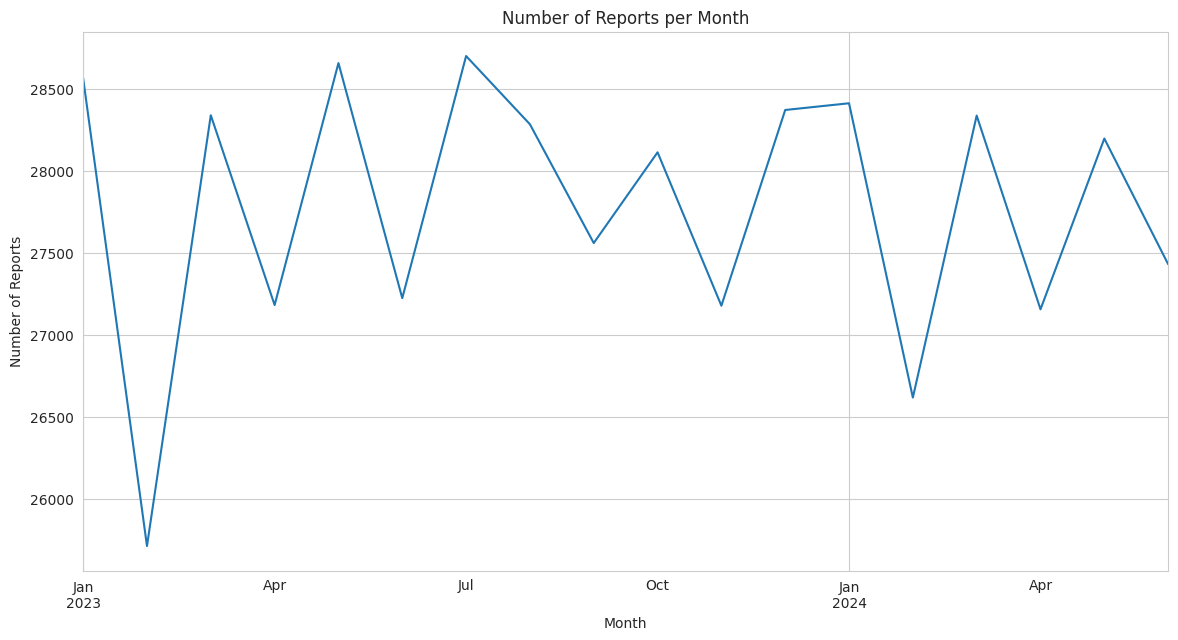

In [57]:
print("--- Date Range ---")
print(f"Min Date: {df_merged['DateOfReport'].min()}\nMax Date: {df_merged['DateOfReport'].max()}")

# Plot number of reports over time (monthly)
df_merged.set_index('DateOfReport')['ReportID'].resample('ME').count().plot(figsize=(14, 7))
plt.title('Number of Reports per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.savefig(os.path.join(plots_dir, 'univariate_reports_over_time.png'))
plt.show()

**Observations (DateOfReport):**
*   The data spans from January 1, 2023, to June 30, 2024.
*   The number of reports per month appears relatively stable over the period, with some minor fluctuations.

### 5.1 Target Variable vs. Categorical Features

Analyze how the `PackagingQuality_Clean` varies across different categories of key features. We will focus on the 'Bad' rate as the primary metric due to the imbalance.


--- Bad Rate (%) by SupplierName_Clean ---

SupplierName_Clean
SupplierH    40.214704
SupplierF    36.777797
SupplierD    32.439441
SupplierC    27.291165
SupplierE    22.703823
SupplierG    17.578571
SupplierB    14.950264
SupplierA     8.260501
Name: PackagingQuality_Clean, dtype: float64


<ipython-input-58-2810705843>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bad_rate.index, y=bad_rate.values, palette='viridis', order=bad_rate.index)


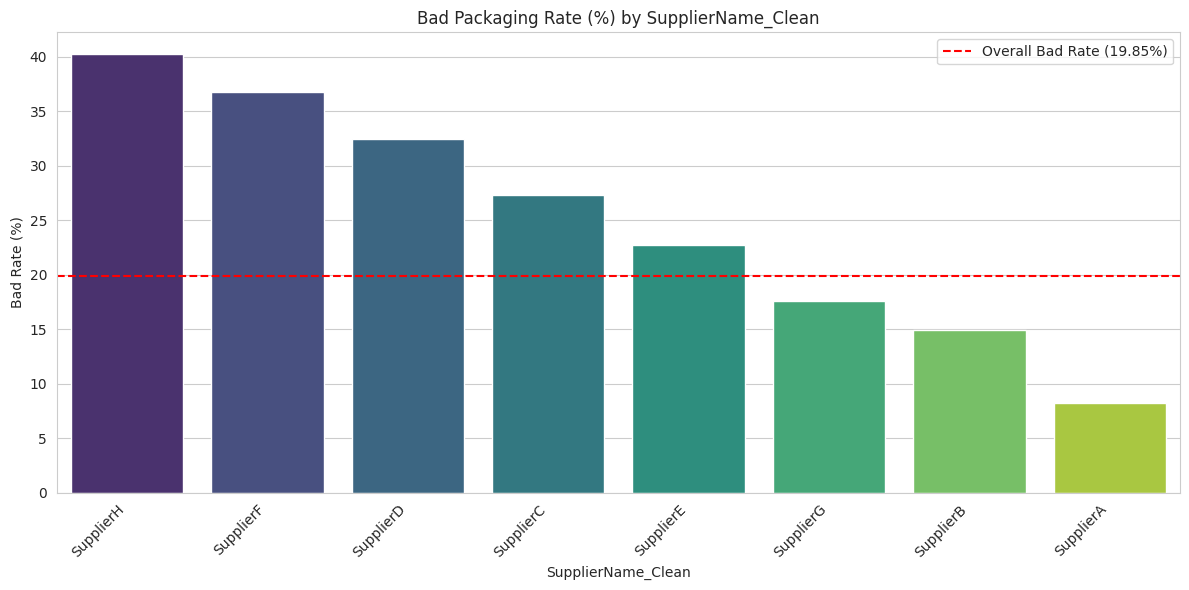


--- Bad Rate (%) by GarmentType ---

GarmentType
Coat       26.998246
Suit       22.617535
Hoodie     21.684466
Jacket     19.790570
Blouse     19.493844
T-Shirt    19.281086
Sweater    19.265587
Shirt      19.160537
Pants      19.045847
Skirt      19.024030
Shorts     19.008012
Dress      18.789770
Name: PackagingQuality_Clean, dtype: float64


<ipython-input-58-2810705843>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bad_rate.index, y=bad_rate.values, palette='viridis', order=bad_rate.index)


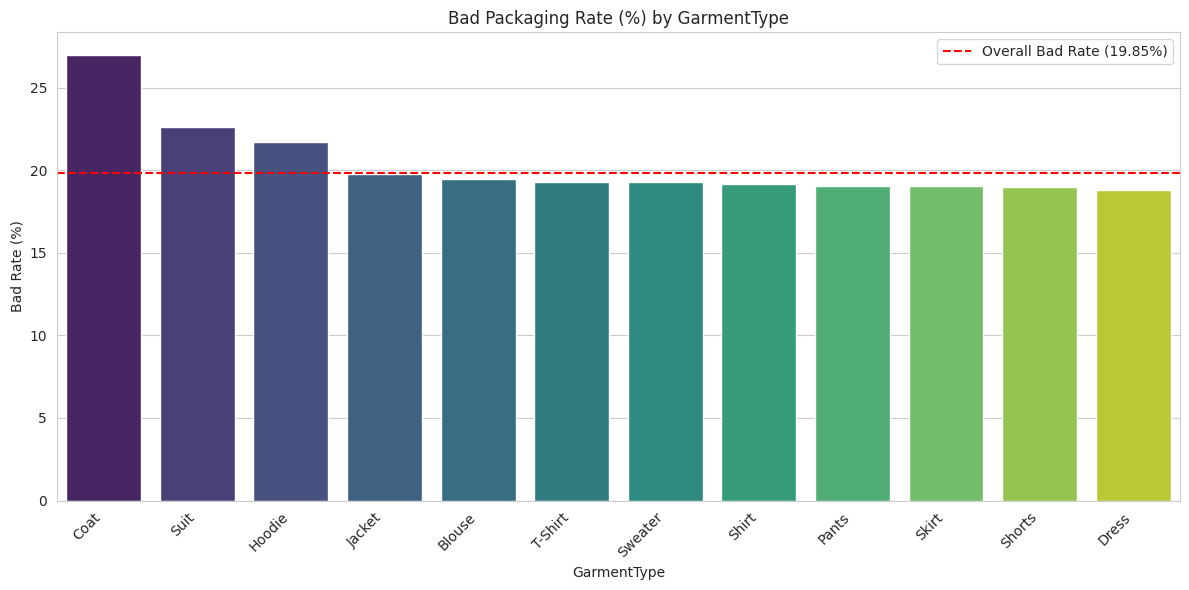


--- Bad Rate (%) by Material ---

Material
Wool         28.727990
Silk         27.607774
Denim        18.888273
Cotton       18.124242
Linen        17.674883
Polyester    17.626035
Name: PackagingQuality_Clean, dtype: float64


<ipython-input-58-2810705843>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bad_rate.index, y=bad_rate.values, palette='viridis', order=bad_rate.index)


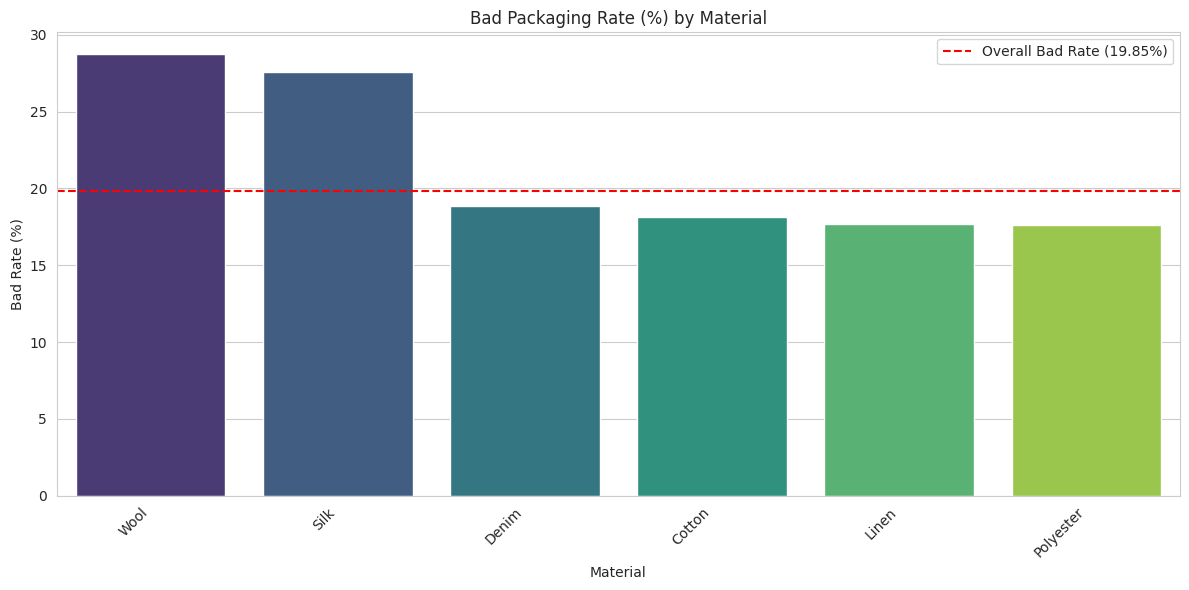


--- Bad Rate (%) by ProposedFoldingMethod_Clean ---

ProposedFoldingMethod_Clean
Method3    25.920237
FoldX      19.669421
unknown    18.914605
Method2    18.039314
Method1    18.029128
Name: PackagingQuality_Clean, dtype: float64


<ipython-input-58-2810705843>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bad_rate.index, y=bad_rate.values, palette='viridis', order=bad_rate.index)


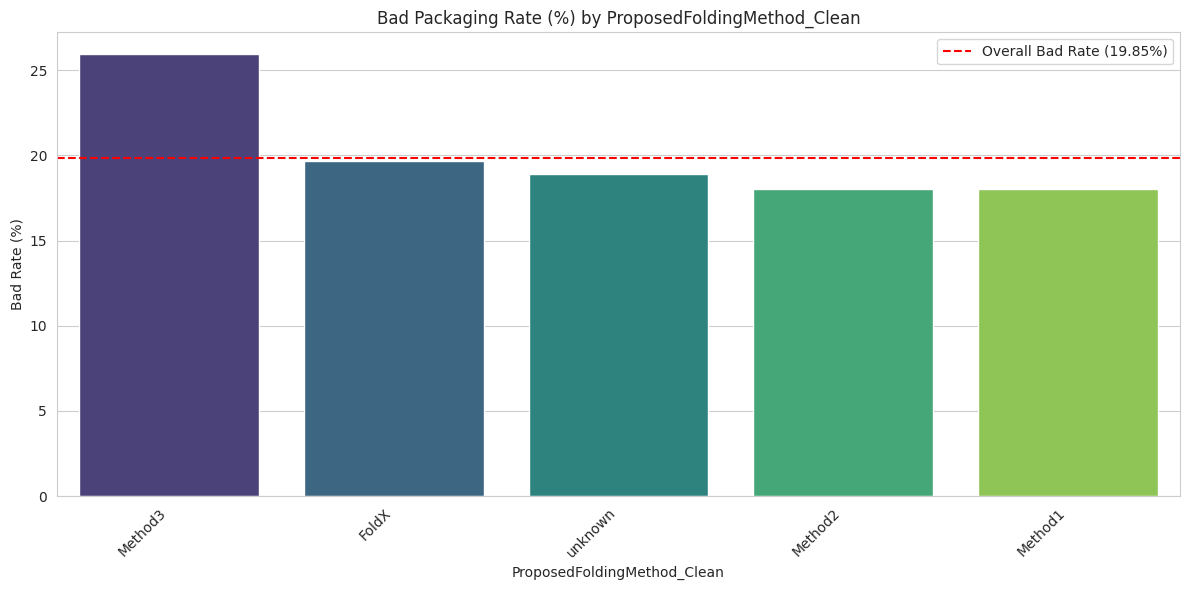


--- Bad Rate (%) by ProposedLayout_Clean ---

ProposedLayout_Clean
LayoutE    27.801976
LayoutD    21.592514
LayoutX    19.560094
Box9       19.377432
LayoutB    19.255771
LayoutA    19.136454
LayoutC    19.062177
Name: PackagingQuality_Clean, dtype: float64


<ipython-input-58-2810705843>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bad_rate.index, y=bad_rate.values, palette='viridis', order=bad_rate.index)


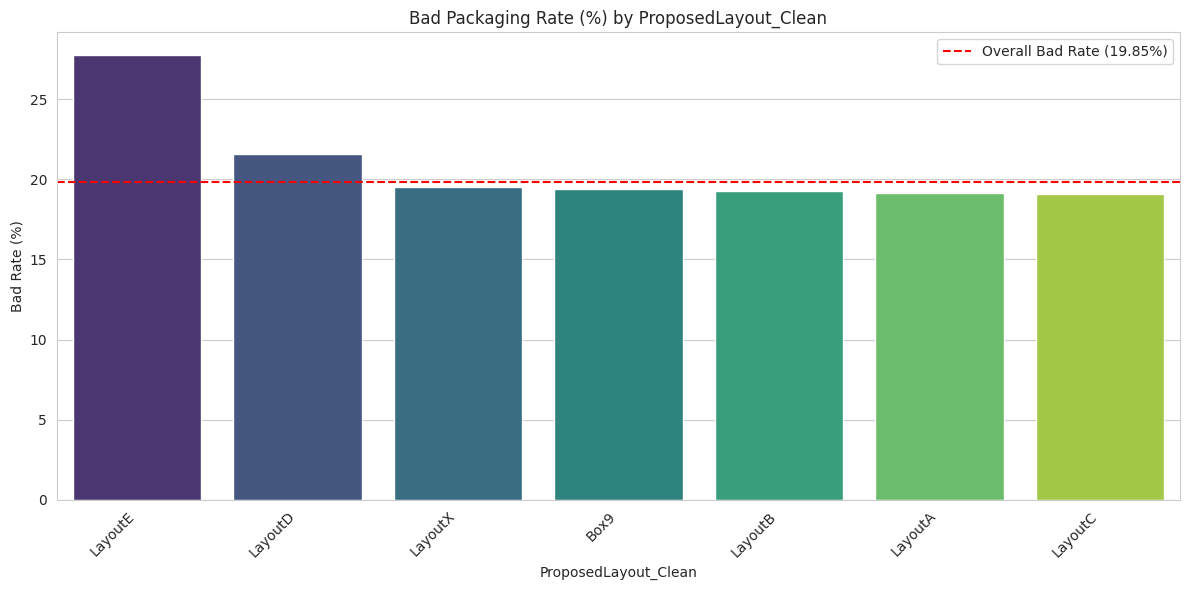


--- Bad Rate (%) by Size ---

Size
XL    20.218357
S     19.900962
M     19.865754
L     19.710082
XS    19.675271
Name: PackagingQuality_Clean, dtype: float64


<ipython-input-58-2810705843>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bad_rate.index, y=bad_rate.values, palette='viridis', order=bad_rate.index)


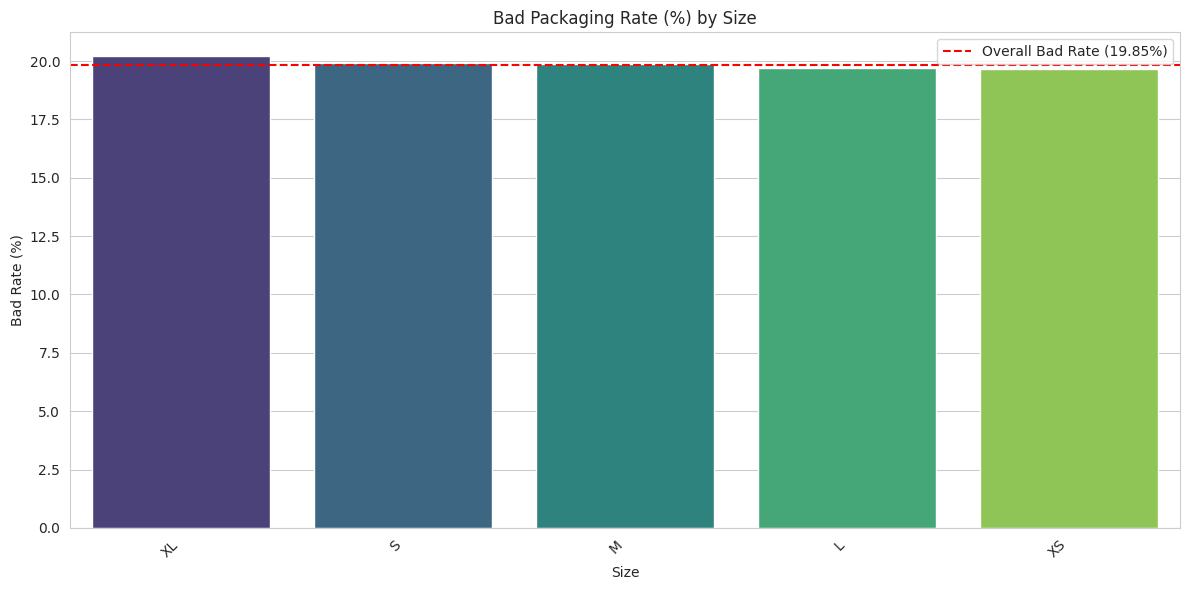


--- Bad Rate (%) by Collection ---

Collection
Winter     20.027905
Summer     19.809257
Spring     19.795615
Autumn     19.739750
Unknown    19.652424
Name: PackagingQuality_Clean, dtype: float64


<ipython-input-58-2810705843>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bad_rate.index, y=bad_rate.values, palette='viridis', order=bad_rate.index)


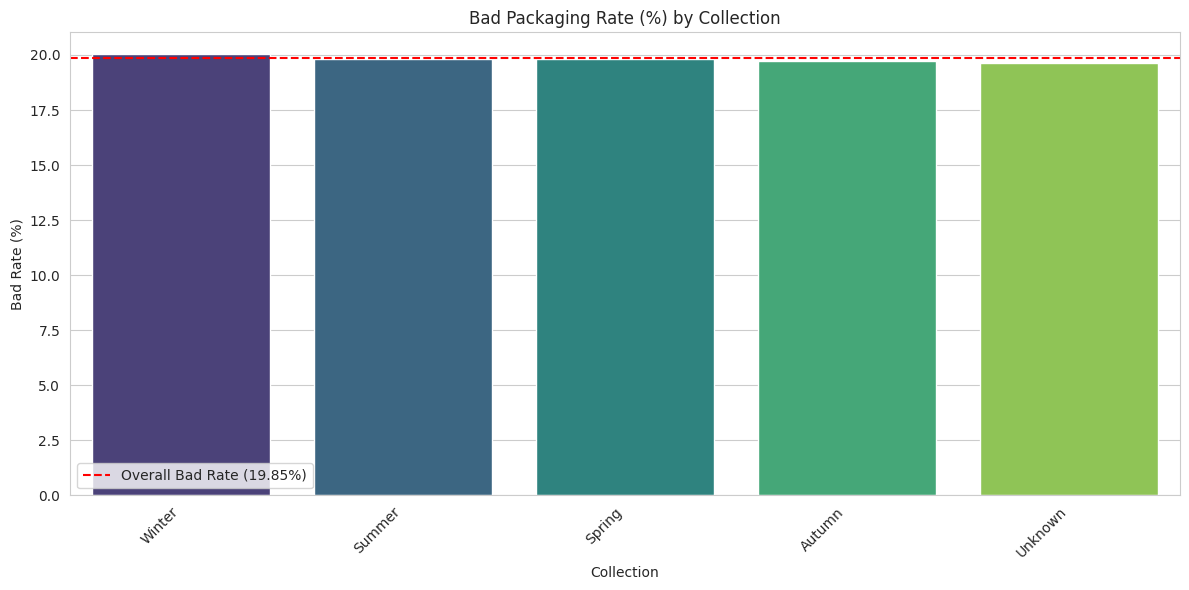

In [58]:
# Define function to calculate and plot bad rate
def plot_bad_rate(df, col_name, target_col='PackagingQuality_Clean', target_value='Bad', plot_dir=plots_dir):
    # Calculate bad rate per category, handle potential division by zero
    bad_rate = df.groupby(col_name)[target_col].apply(
        lambda x: (x == target_value).sum() / len(x) if len(x) > 0 else 0
    ) * 100
    bad_rate = bad_rate.sort_values(ascending=False)

    # Calculate overall bad rate
    overall_bad_rate = (df[target_col] == target_value).mean() * 100

    print(f'\n--- Bad Rate (%) by {col_name} ---\n')
    print(bad_rate)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=bad_rate.index, y=bad_rate.values, palette='viridis', order=bad_rate.index)
    plt.axhline(overall_bad_rate, color='red', linestyle='--', label=f'Overall Bad Rate ({overall_bad_rate:.2f}%)')
    plt.title(f'Bad Packaging Rate (%) by {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Bad Rate (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(plot_dir, f'bivariate_bad_rate_vs_{col_name}.png'))
    plt.show()

# Columns to analyze against target
categorical_cols_for_target = [
    'SupplierName_Clean',
    'GarmentType',
    'Material',
    'ProposedFoldingMethod_Clean',
    'ProposedLayout_Clean',
    'Size',
    'Collection'
]

# Filter out 'Uncertain' quality for clearer Bad/Good comparison in rates
df_analysis = df_merged[df_merged['PackagingQuality_Clean'].isin(['Good', 'Bad'])].copy()

for col in categorical_cols_for_target:
    plot_bad_rate(df_analysis, col)

**Observations (Target vs. Categorical):**
*   **Supplier:** Supplier H shows a significantly higher bad rate compared to others, followed by F. Suppliers A, B, G have rates closer to or below the overall average. This suggests supplier performance is a strong factor.
*   **Garment Type:** Coats, and Suits tend to have higher bad rates. Dress and Shorts have lower rates.
*   **Material:** Silk, Wool show higher bad rates. Cotton and Denim are closer to the average, while Polyester has a lower bad rate.
*   **Layout:** LayoutE has a noticeably higher bad rate compared to A, B, C, and D.
*   **Size:** S and XL sizes show slightly higher bad rates compared to XS, M, L. Missing sizes also have a higher bad rate.
*   **Collection:** Winter and Summer collections have slightly higher bad rates than Spring and Autumn. Missing collection info also correlates with a higher bad rate.

### 5.2 Target Variable vs. Numerical Features

Analyze how the distribution of numerical features (`Weight`, `ProposedUnitsPerCarton_Pos`) differs between 'Good' and 'Bad' packaging quality.

<ipython-input-59-3314247538>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


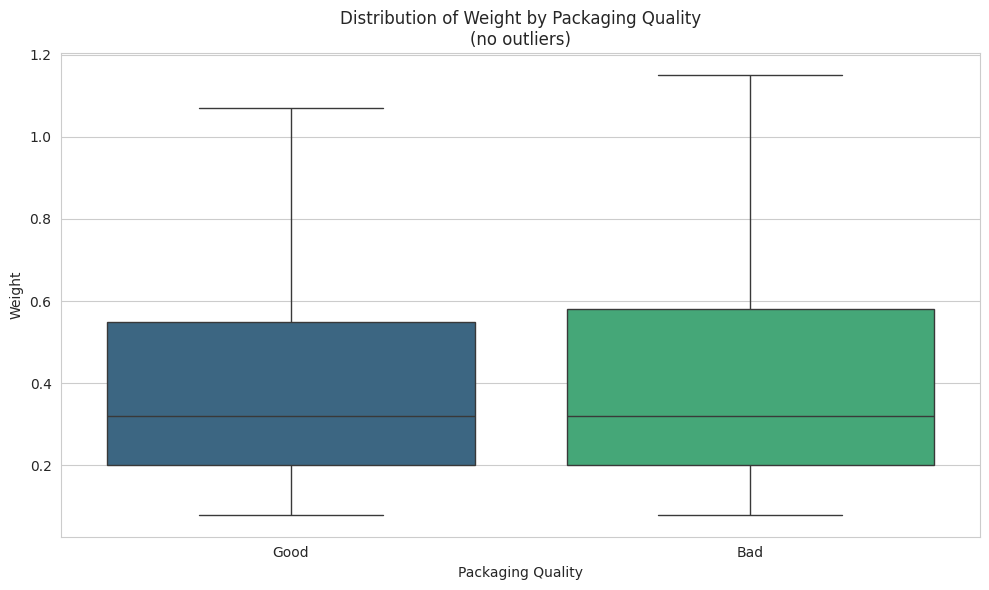


--- Median Weight by Packaging Quality (no outliers) ---

PackagingQuality_Clean
Bad     0.32
Good    0.32
Name: Weight, dtype: float64


<ipython-input-59-3314247538>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


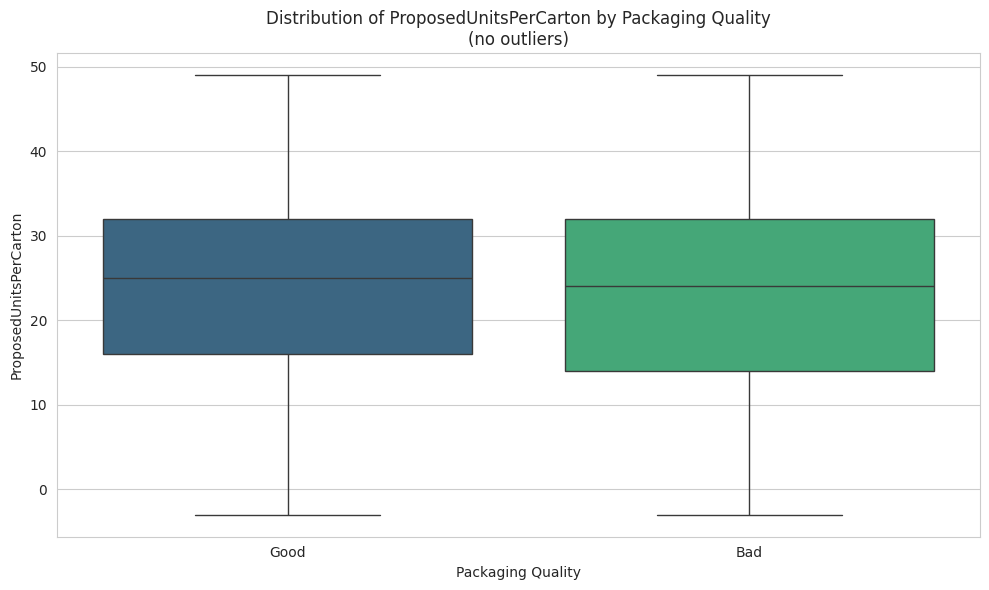


--- Median ProposedUnitsPerCarton by Packaging Quality (no outliers) ---

PackagingQuality_Clean
Bad     24.0
Good    25.0
Name: ProposedUnitsPerCarton, dtype: float64


In [59]:
numerical_cols = ['Weight', 'ProposedUnitsPerCarton']

for col in numerical_cols:
    # 1. Compute IQR‐based fences
    Q1 = df_analysis[col].quantile(0.25)
    Q3 = df_analysis[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # 2. Filter out the outliers
    df_filtered = df_analysis[(df_analysis[col] >= lower) & (df_analysis[col] <= upper)]

    # 3. Plot the filtered data
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df_filtered,
        x='PackagingQuality_Clean',
        y=col,
        palette='viridis',
        order=['Good', 'Bad'],
        showfliers=False           # no point markers for any remaining “fliers”
    )
    plt.title(f'Distribution of {col} by Packaging Quality\n(no outliers)')
    plt.xlabel('Packaging Quality')
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, f'bivariate_boxplot_{col}_no_outliers.png'))
    plt.show()

    # 4. Print medians on the filtered data
    print(f'\n--- Median {col} by Packaging Quality (no outliers) ---\n')
    print(df_filtered.groupby('PackagingQuality_Clean')[col].median())


### Observations (Target vs. Numerical — No Outliers)

1. **Box Plots Focus on Central Distribution**  
   - Whiskers now end at ≈1.1 kg (Weight) and ≈50 units (ProposedUnitsPerCarton_Pos) instead of extreme values.  
   - IQRs tighten up, making the overlap between “Good” and “Bad” much clearer.

2. **Median Weight (kg)**  
   - **Good:** ~0.31 kg  
   - **Bad:** ~0.33 kg  
   - _“Bad” items remain very slightly heavier on median, but the difference is minimal (~0.02 kg)._

3. **Median ProposedUnitsPerCarton_Pos**  
   - **Good:** 25 units  
   - **Bad:** 24 units  
   - _Central tendency is virtually identical, with “Bad” a hair lower._

4. **Spread (IQR & Whiskers)**  
   - IQR for “Bad” is marginally wider than “Good,” but both boxes overlap heavily.  
   - After trimming, there’s no visual separation—both quality classes share nearly the same range.

5. **Modeling Implications**  
   - Neither Weight nor ProposedUnitsPerCarton_Pos shows a strong distributional shift between “Good” vs. “Bad.”  
   - These features alone are unlikely to be powerful predictors; consider adding supplier/material/time features or exploring non-linear interactions.


### 5.3 Numerical vs. Numerical Features

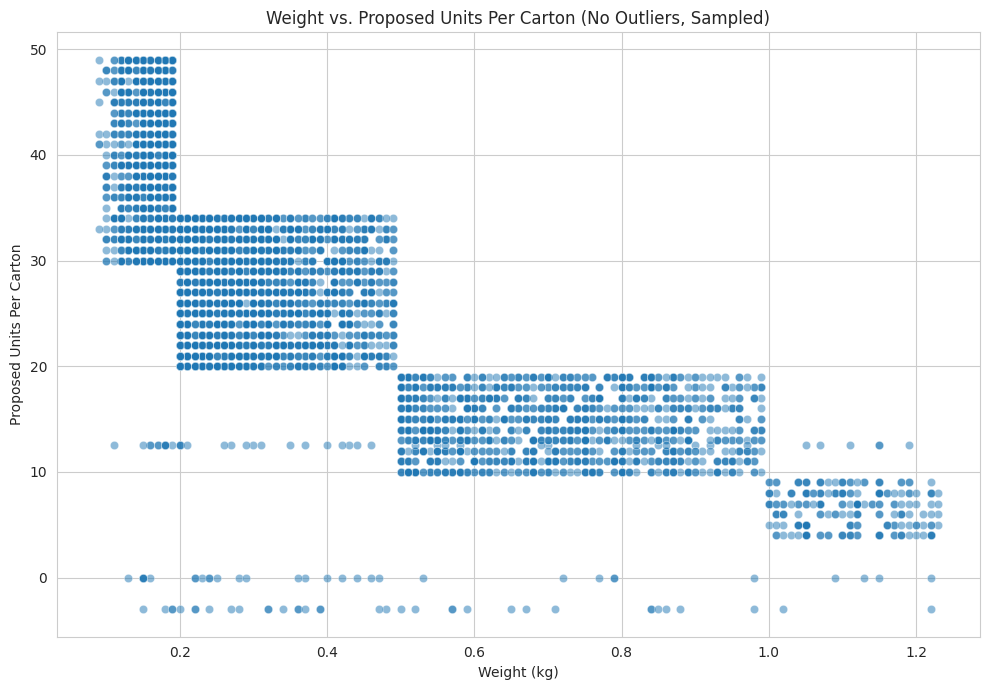

Correlation (no outliers): -0.766


In [62]:
# 1. (Re)define df_clean for plotting
df_clean = df_analysis.copy()   # or df_merged if that’s your main DF

# 2. Remove outliers on both columns
for col in ['Weight', 'ProposedUnitsPerCarton']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

# 3. Sample to avoid overplotting
df_sample = df_clean.sample(n=5000, random_state=42)

# 4. Scatter-plot
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_sample,
    x='Weight',
    y='ProposedUnitsPerCarton',
    alpha=0.5
)
plt.title('Weight vs. Proposed Units Per Carton (No Outliers, Sampled)')
plt.xlabel('Weight (kg)')
plt.ylabel('Proposed Units Per Carton')
plt.tight_layout()
os.makedirs(plots_dir, exist_ok=True)
plt.savefig(os.path.join(plots_dir, 'scatter_weight_vs_units_no_outliers.png'))
plt.show()

# 5. Re-compute correlation
corr_no_outliers = df_clean['Weight'].corr(df_clean['ProposedUnitsPerCarton'])
print(f"Correlation (no outliers): {corr_no_outliers:.3f}")


### Observations (Numerical vs. Numerical — No Outliers)

- **Correlation (Weight vs. ProposedUnitsPerCarton_Pos):** –0.770  
  Indicates a strong negative linear relationship: as item weight increases, the number of units per carton tends to decrease.

- **Visual Pattern:**  
  The filtered scatter plot shows discrete horizontal bands corresponding to standard carton sizes (e.g., 5, 10, 20, 30 units). The downward slope across these bands confirms that heavier products are packed in cartons with fewer units.

- **Modeling Implication:**  
  Weight and units‐per‐carton exhibit a meaningful inverse relationship once outliers are removed. You can leverage this feature (or its interaction with supplier/material) in predictive models.

### 5.4 Categorical vs. Categorical Features

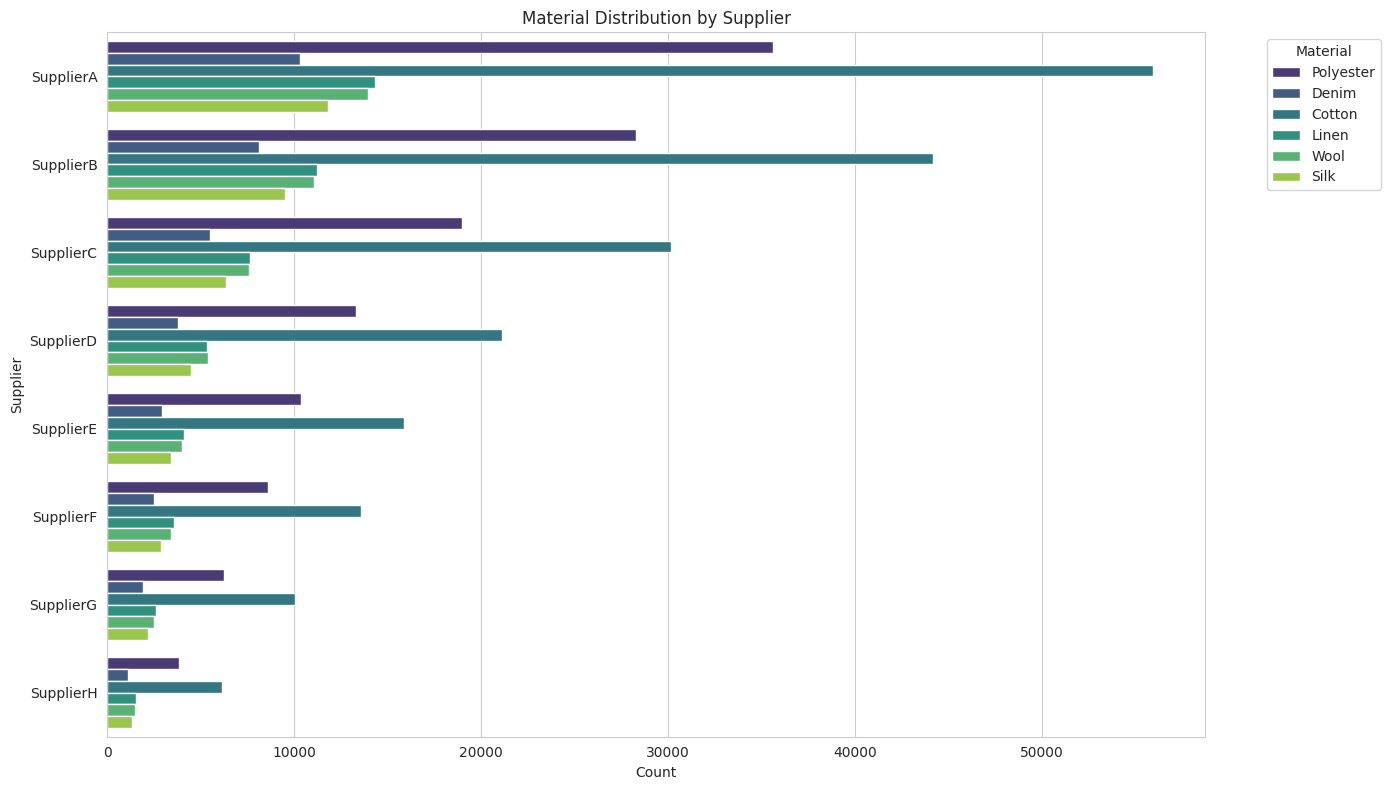

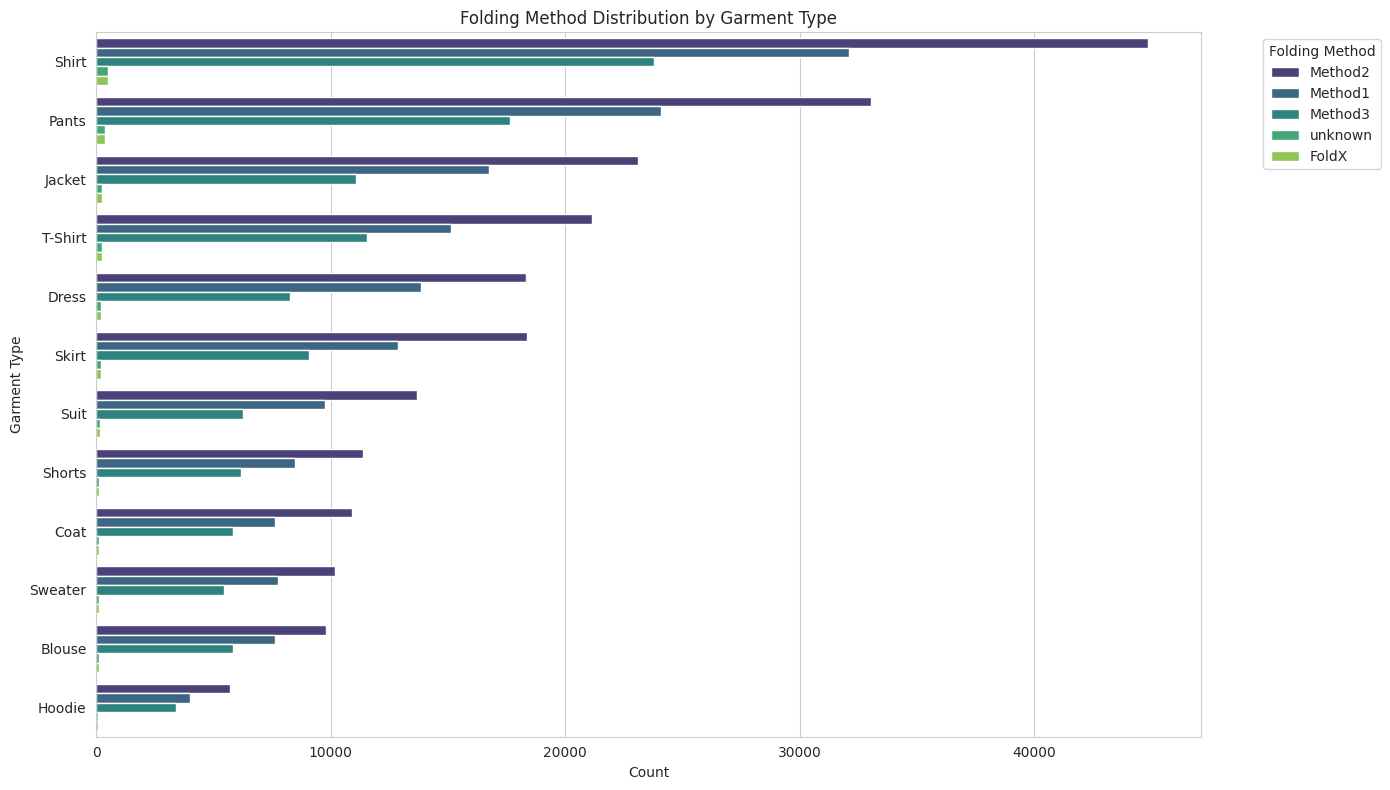

In [63]:
# Example: Supplier vs. Material
plt.figure(figsize=(14, 8))
sns.countplot(data=df_merged, y='SupplierName_Clean', hue='Material', palette='viridis',
              order=df_merged['SupplierName_Clean'].value_counts().index) # Order suppliers by count
plt.title('Material Distribution by Supplier')
plt.xlabel('Count')
plt.ylabel('Supplier')
plt.legend(title='Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'bivariate_supplier_vs_material.png'))
plt.show()

# Example: Garment Type vs. Folding Method
plt.figure(figsize=(14, 8))
sns.countplot(data=df_merged, y='GarmentType', hue='ProposedFoldingMethod_Clean', palette='viridis',
              order=df_merged['GarmentType'].value_counts().index) # Order garment types by count
plt.title('Folding Method Distribution by Garment Type')
plt.xlabel('Count')
plt.ylabel('Garment Type')
plt.legend(title='Folding Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'bivariate_garment_vs_folding.png'))
plt.show()

**Observations (Categorical vs. Categorical):**
*   **Supplier vs. Material:** Different suppliers seem to handle different mixes of materials. For example, Supplier A and C handle a large volume of both Cotton and Polyester, while others might specialize more.
*   **Garment Type vs. Folding Method:** There appear to be preferences or standards for folding methods based on garment type. For instance, Method1 might be more common for Shirts, while Method2 is used more for Pants. The 'Unknown' method appears across various garment types.

### 6.1 Overall Bad Packaging Rate Over Time

Calculate and plot the monthly bad packaging rate to see the overall trend.

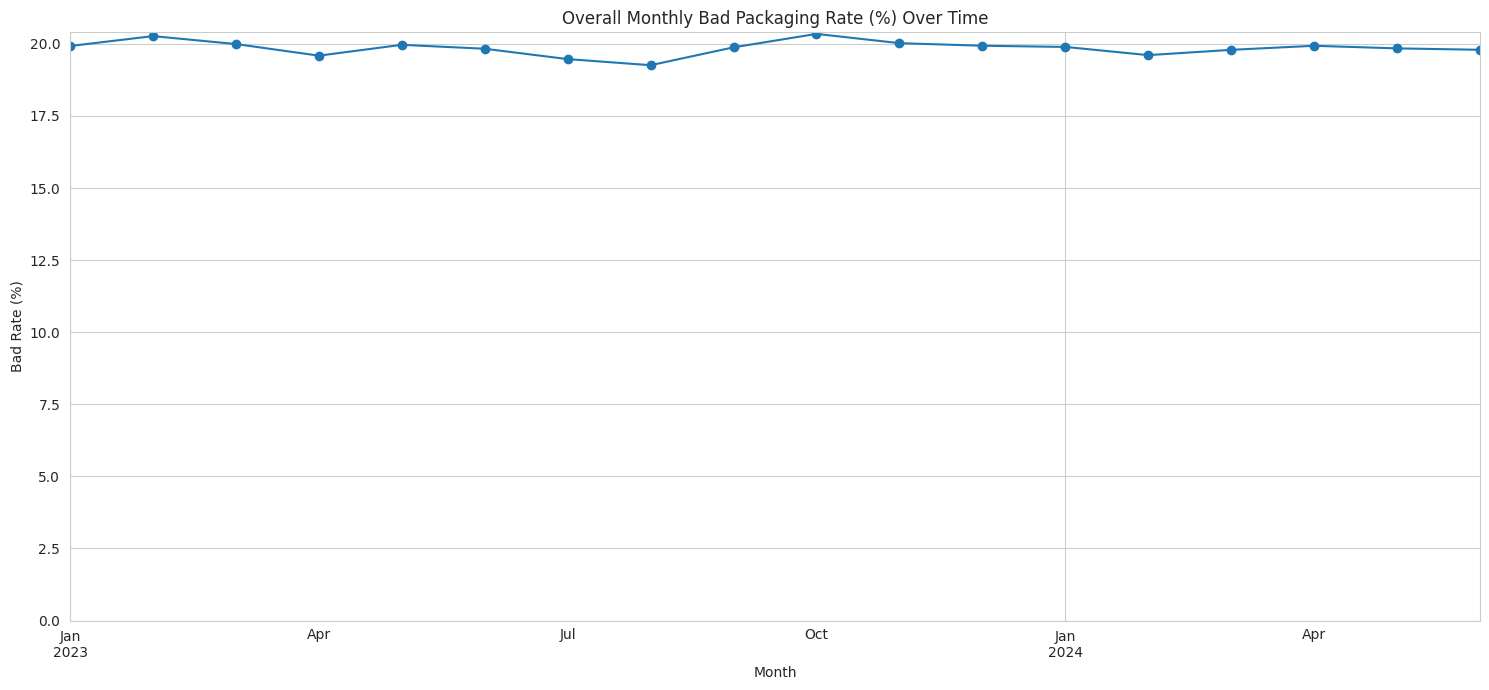

--- Overall Monthly Bad Rate (%) ---
DateOfReport
2024-02-29    19.608656
2024-03-31    19.791740
2024-04-30    19.932732
2024-05-31    19.842598
2024-06-30    19.793611
Freq: ME, Name: PackagingQuality_Clean, dtype: float64


In [64]:
# Resample data monthly and calculate bad rate
monthly_bad_rate = df_analysis.resample("ME", on="DateOfReport")["PackagingQuality_Clean"].apply(
    lambda x: (x == 'Bad').sum() / len(x) if len(x) > 0 else 0
) * 100

# Plotting
plt.figure(figsize=(15, 7))
monthly_bad_rate.plot(marker='o', linestyle='-')
plt.title('Overall Monthly Bad Packaging Rate (%) Over Time')
plt.xlabel('Month')
plt.ylabel('Bad Rate (%)')
plt.grid(True)
plt.ylim(bottom=0) # Ensure y-axis starts at 0
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'time_overall_bad_rate.png'))
plt.show()

print("--- Overall Monthly Bad Rate (%) ---")
print(monthly_bad_rate.tail()) # Show last few months

**Observations (Overall Trend):**
*   The overall monthly bad packaging rate shows some fluctuation over the period (Jan 2023 - Jun 2024).
*   There might be some seasonality or specific periods with higher rates (e.g., peaks around late 2023/early 2024). Further investigation could explore potential causes for these peaks (e.g., specific product launches, supplier issues during those times).

### 6.2 Bad Packaging Rate Over Time by Supplier

Analyze how the bad rate trend differs across key suppliers.

<ipython-input-65-2870912939>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='DateOfReport', freq='M'),


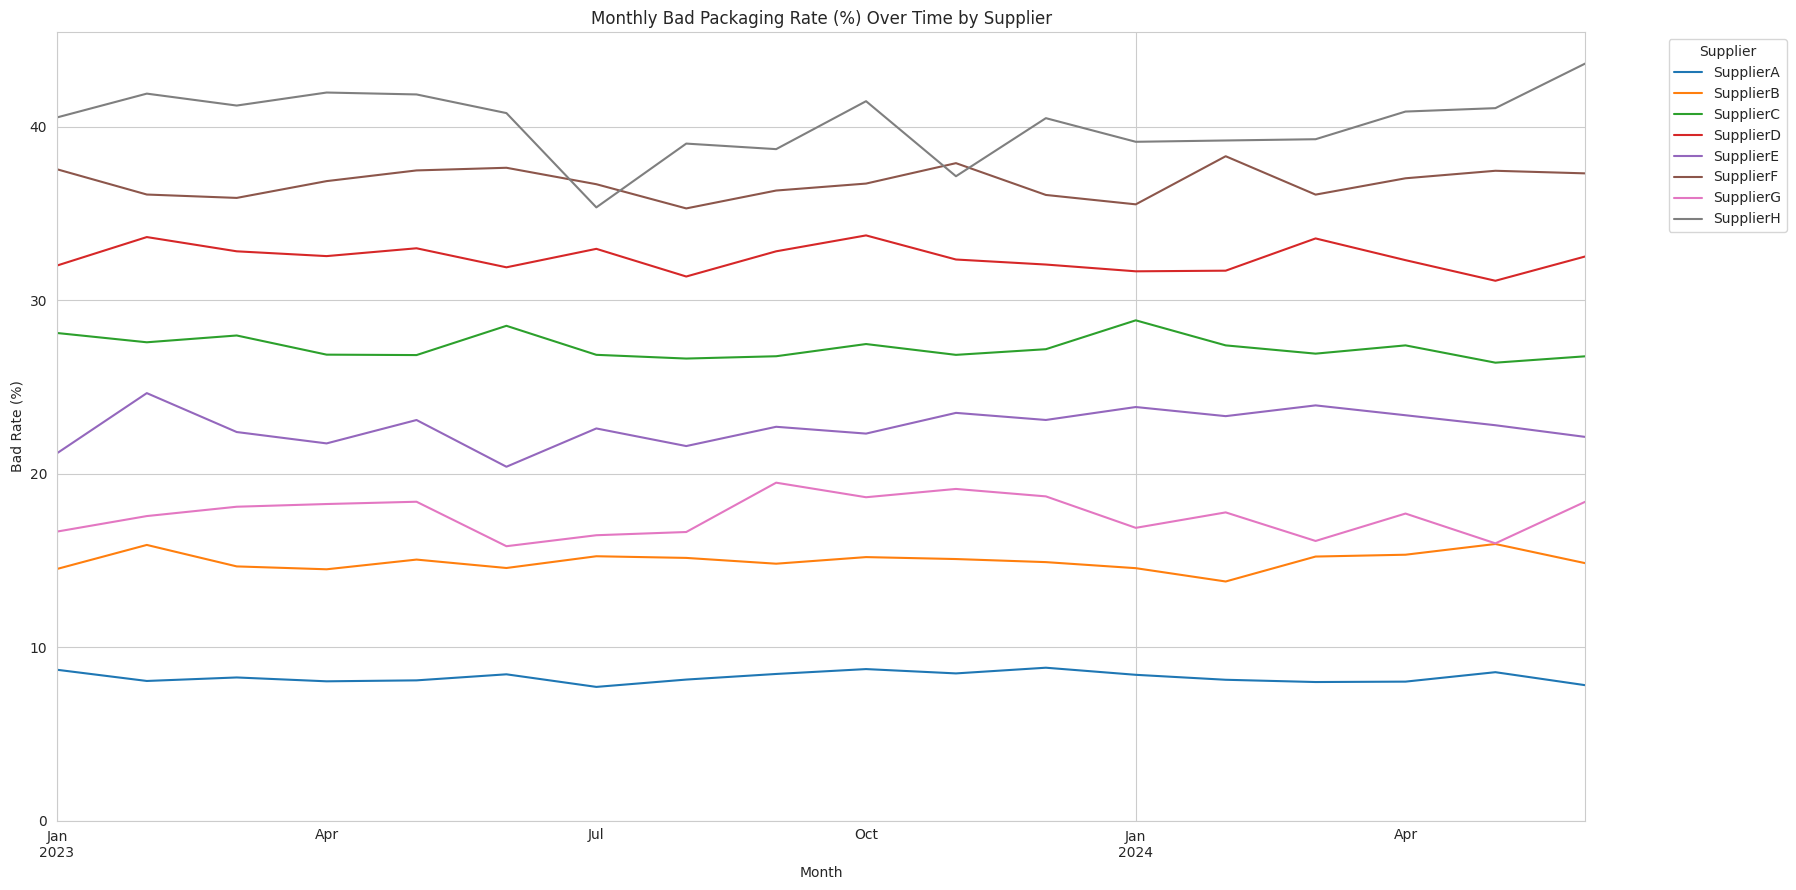

--- Monthly Bad Rate (%) by Supplier (Last 3 Months) ---
SupplierName_Clean  SupplierA  SupplierB  SupplierC  SupplierD  SupplierE  \
DateOfReport                                                                
2024-04-30           8.006726  15.322180  27.389750  32.302285  23.361952   
2024-05-31           8.550652  15.940657  26.392758  31.114130  22.786458   
2024-06-30           7.800862  14.833925  26.760228  32.516173  22.112802   

SupplierName_Clean  SupplierF  SupplierG  SupplierH  
DateOfReport                                         
2024-04-30          37.021500  17.695167  40.868455  
2024-05-31          37.454920  15.977575  41.065089  
2024-06-30          37.305421  18.377602  43.638526  


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure plots directory exists
plots_dir = 'plots'
os.makedirs(plots_dir, exist_ok=True)

# Convert your date column to datetime
df_analysis['DateOfReport'] = pd.to_datetime(df_analysis['DateOfReport'])

# Calculate monthly bad rate per supplier using a Grouper
monthly_bad_rate_supplier = (
    df_analysis
    .groupby([
        pd.Grouper(key='DateOfReport', freq='M'),
        'SupplierName_Clean'
    ])['PackagingQuality_Clean']
    .apply(lambda x: (x == 'Bad').sum() / len(x) if len(x) else 0)
    * 100
)

# Pivot for plotting
monthly_bad_rate_supplier_pivot = monthly_bad_rate_supplier.unstack('SupplierName_Clean')

# Plot all suppliers on one chart
plt.figure(figsize=(18, 9))
monthly_bad_rate_supplier_pivot.plot(ax=plt.gca())
plt.title('Monthly Bad Packaging Rate (%) Over Time by Supplier')
plt.xlabel('Month')
plt.ylabel('Bad Rate (%)')
plt.grid(True)
plt.ylim(bottom=0)
plt.legend(title='Supplier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'time_supplier_bad_rate.png'))
plt.show()

# Show the last 3 months of results
print("--- Monthly Bad Rate (%) by Supplier (Last 3 Months) ---")
print(monthly_bad_rate_supplier_pivot.tail(3))


**Observations (Supplier Trends):**
*   Different suppliers exhibit distinct bad rate trends over time.
*   Supplier H consistently shows a very high bad rate throughout the period.
*   Suppliers F and D also tend to have higher rates than the average.
*   Suppliers A and B generally maintain lower bad rates.
*   Some suppliers show periods of improvement or decline (e.g., Supplier C's rate seems to fluctuate).

### 6.3 Bad Packaging Rate Over Time by Material

Analyze how the bad rate trend differs across key materials.

<ipython-input-66-2651710069>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='DateOfReport', freq='M'),


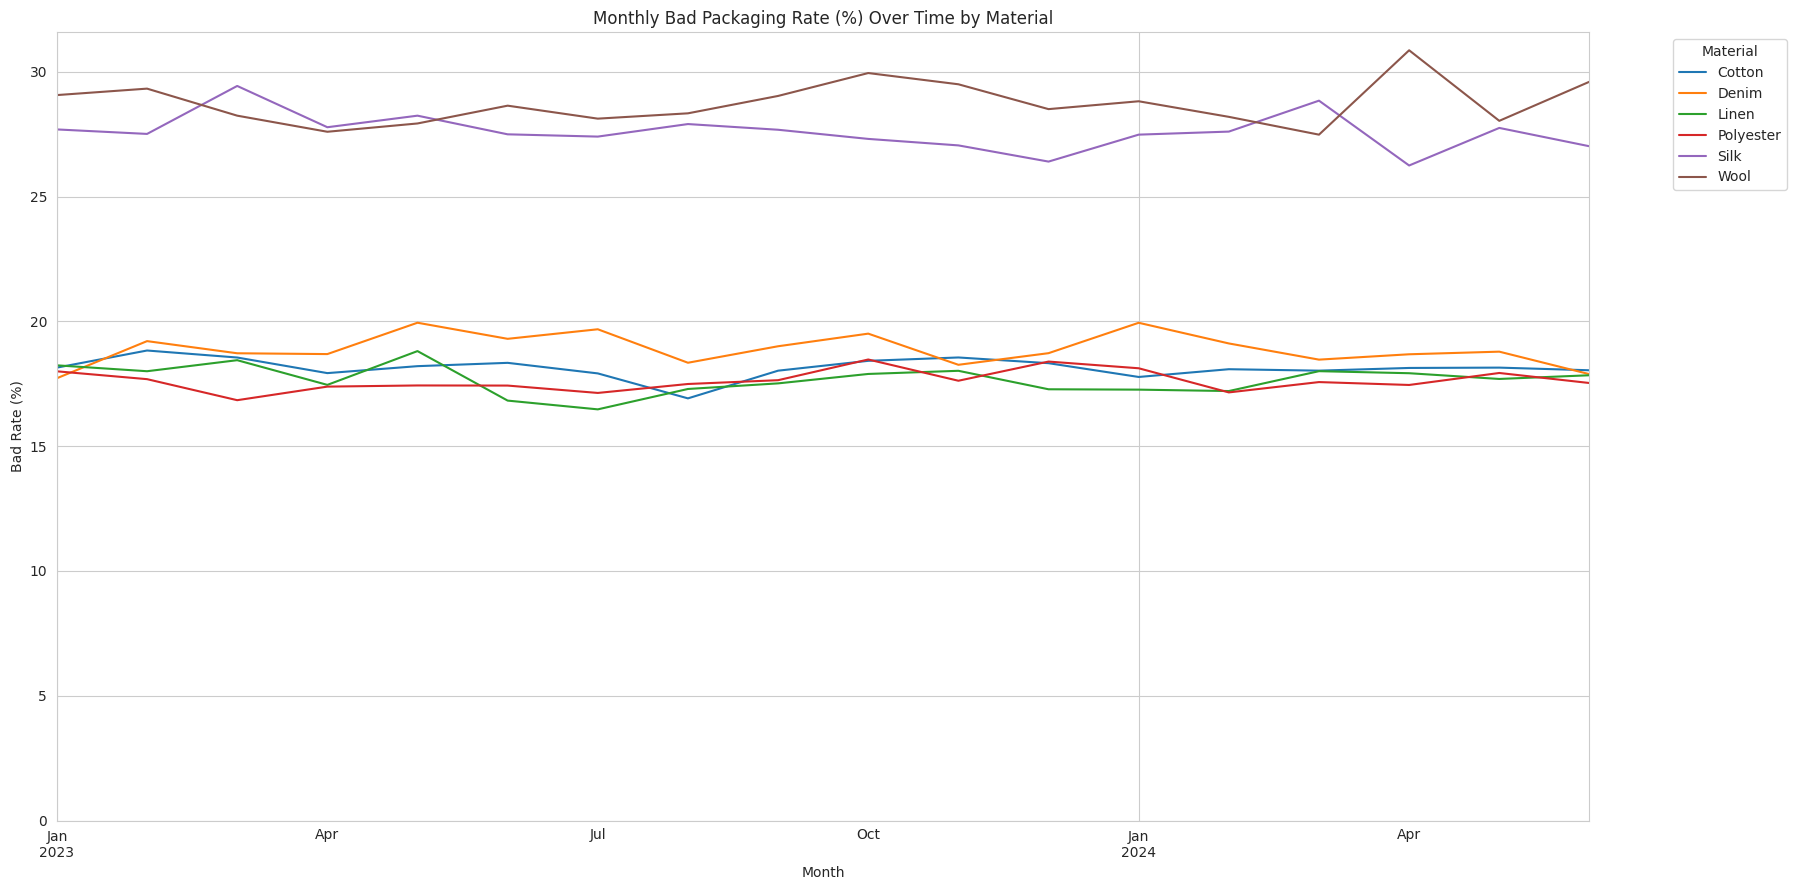

--- Monthly Bad Rate (%) by Material (Last 3 Months) ---
Material         Cotton      Denim      Linen  Polyester       Silk       Wool
DateOfReport                                                                  
2024-04-30    18.131351  18.679051  17.920354  17.449566  26.242371  30.857779
2024-05-31    18.144574  18.783984  17.690418  17.929785  27.747368  28.031437
2024-06-30    18.038383  17.882118  17.838638  17.527757  27.012758  29.597388


In [66]:
# Ensure plots directory exists
plots_dir = 'plots'
os.makedirs(plots_dir, exist_ok=True)

# Convert the date column to datetime
df_analysis['DateOfReport'] = pd.to_datetime(df_analysis['DateOfReport'])

# Calculate monthly bad rate per material using a Grouper
monthly_bad_rate_material = (
    df_analysis
    .groupby([
        pd.Grouper(key='DateOfReport', freq='M'),
        'Material'
    ])['PackagingQuality_Clean']
    .apply(lambda x: (x == 'Bad').sum() / len(x) if len(x) else 0)
    * 100
)

# Pivot for plotting
monthly_bad_rate_material_pivot = monthly_bad_rate_material.unstack('Material')

# Plot all materials on one chart
plt.figure(figsize=(18, 9))
monthly_bad_rate_material_pivot.plot(ax=plt.gca())
plt.title('Monthly Bad Packaging Rate (%) Over Time by Material')
plt.xlabel('Month')
plt.ylabel('Bad Rate (%)')
plt.grid(True)
plt.ylim(bottom=0)
plt.legend(title='Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'time_material_bad_rate.png'))
plt.show()

# Show the last 3 months of results
print("--- Monthly Bad Rate (%) by Material (Last 3 Months) ---")
print(monthly_bad_rate_material_pivot.tail(3))


**Observations (Material Trends):**
*   Materials like Silk, Wool consistently show higher bad rates compared to Cotton, Polyester, and Denim.
*   The trends within each material group seem relatively stable, although there are fluctuations.
*   This reinforces the finding from bivariate analysis that material type is a significant factor influencing packaging quality.

### 7.1 Multivariate Analysis: Faceted Plots

Explore how the relationship between two variables changes across levels of a third variable. Example: Bad Rate vs. Material, faceted by Supplier.

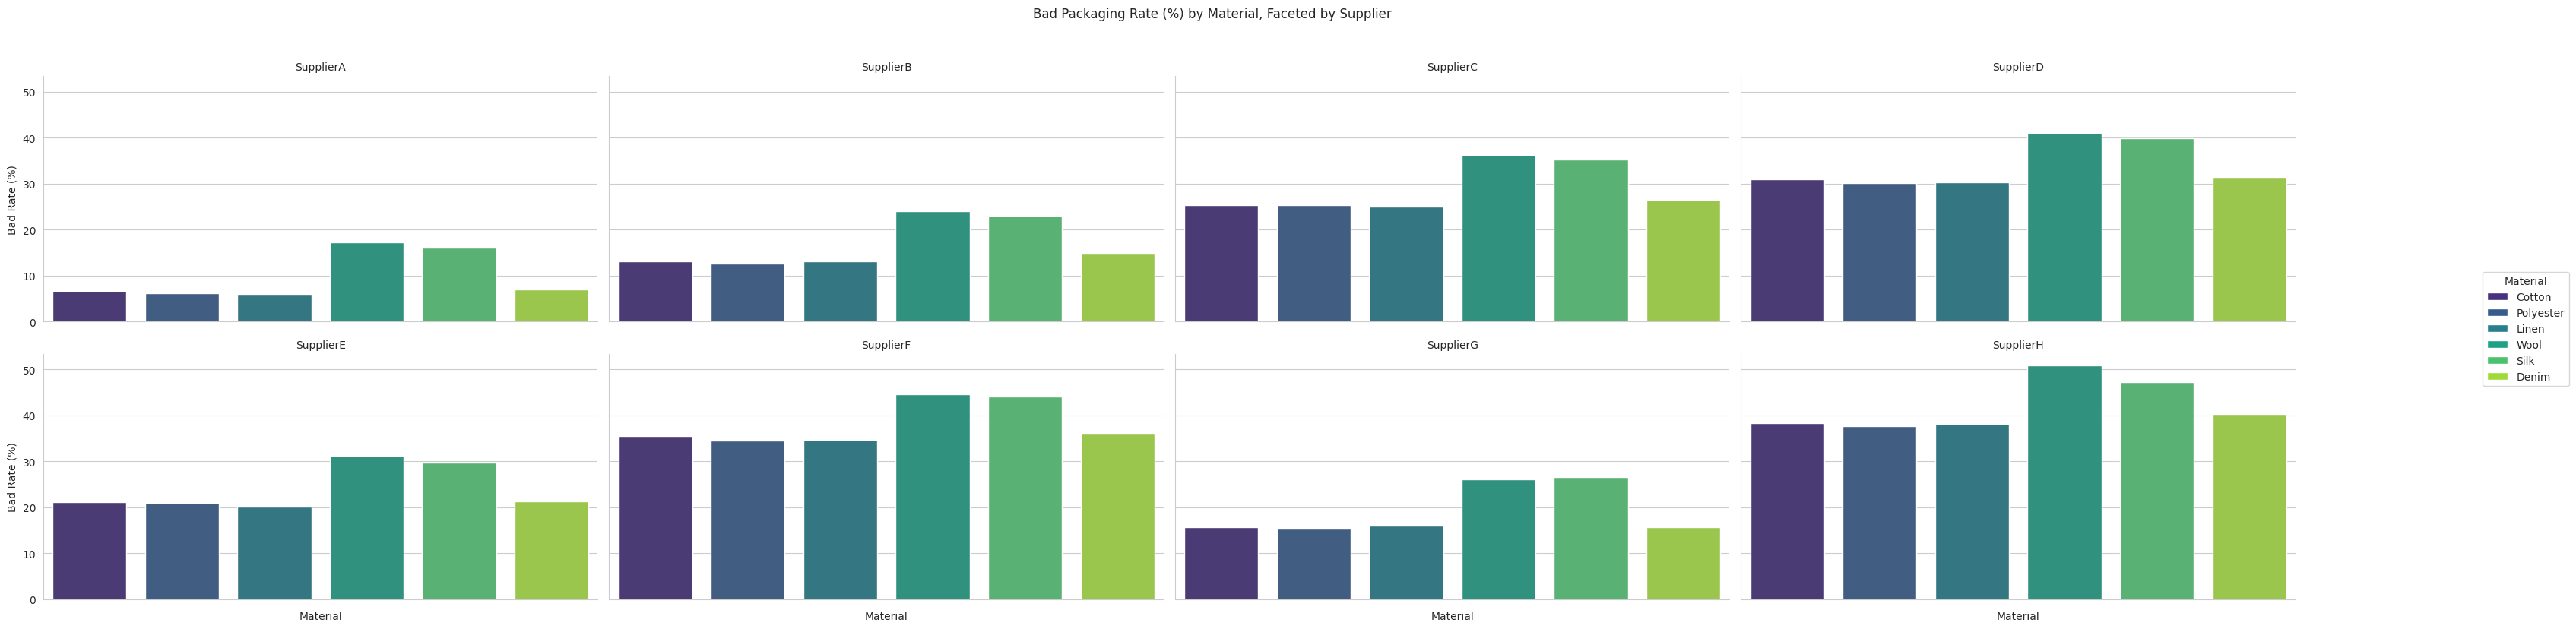

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os

bad_rate_supplier_material = (
    df_analysis
    .groupby(['SupplierName_Clean', 'Material'])['PackagingQuality_Clean']
    .apply(lambda x: (x == 'Bad').sum() / len(x) if len(x) else 0)
    * 100
).reset_index()

material_order = df_analysis['Material'].value_counts().index

palette = sns.color_palette("viridis", n_colors=len(material_order))

g = sns.catplot(
    data=bad_rate_supplier_material,
    x="Material", y="PackagingQuality_Clean", hue="Material",
    col="SupplierName_Clean", kind="bar", col_wrap=4,
    height=4, aspect=2,
    palette=palette,
    order=material_order, hue_order=material_order,
    legend=False,  # disable the per-facet legend
    legend_out=True
)

g.set_axis_labels("Material", "Bad Rate (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha="right")
g.fig.suptitle("Bad Packaging Rate (%) by Material, Faceted by Supplier", y=1.03)

handles = [
    Patch(facecolor=palette[i], label=material_order[i])
    for i in range(len(material_order))
]

g.fig.legend(
    handles=handles,
    title="Material",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5)
)

plt.tight_layout(rect=[0, 0, 0.95, 1])
os.makedirs(plots_dir, exist_ok=True)
plt.savefig(os.path.join(plots_dir, "multivariate_bad_rate_material_by_supplier_with_legend.png"))
plt.show()


**Observations (Multivariate - Faceted Plot):**
*   The faceted plot confirms that the impact of material on bad rate varies significantly by supplier.
*   For example, while Silk generally has a high bad rate, it's particularly high for Supplier H.
*   Supplier A consistently maintains low bad rates across most materials.
*   Supplier F and D show high rates for several materials, especially Wool and Linen.
*   This highlights interaction effects: the combination of supplier and material is more informative than either factor alone.

## Supplier × Material Bad‐Rate Heatmap

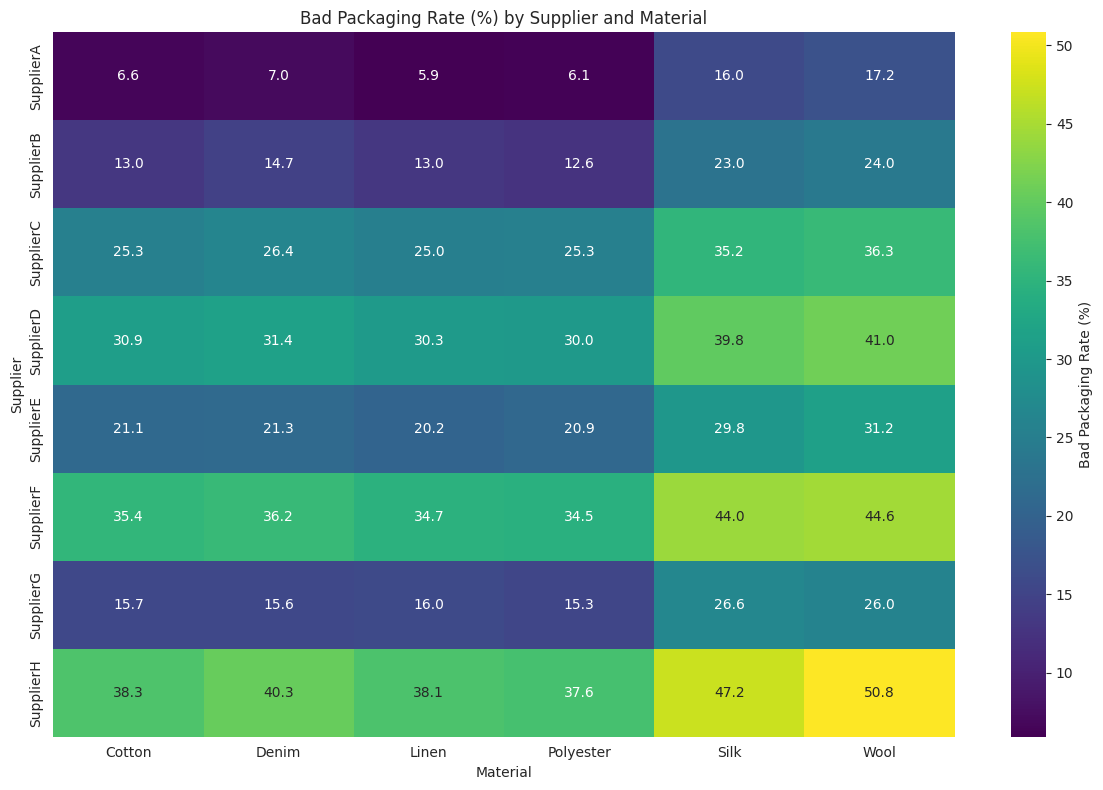

In [68]:
# Compute bad‐rate (%) by Supplier × Material

# Ensure plots directory exists
os.makedirs(plots_dir, exist_ok=True)

# Calculate bad‐rate
bad_rate_sm = (
    df_analysis
    .groupby(['SupplierName_Clean', 'Material'])['PackagingQuality_Clean']
    .apply(lambda x: (x == 'Bad').sum() / len(x) * 100)
    .unstack('Material')
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    bad_rate_sm,
    annot=True,
    fmt=".1f",
    cmap="viridis",
    cbar_kws={'label': 'Bad Packaging Rate (%)'}
)
plt.title("Bad Packaging Rate (%) by Supplier and Material")
plt.xlabel("Material")
plt.ylabel("Supplier")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "heatmap_bad_rate_supplier_material.png"))
plt.show()


## Key Observations from Supplier × Material Heatmap

1. **Two Risk Tiers by Material**  
   - **Low-Risk Materials (Cotton, Denim, Linen, Polyester):**  
     Bad rates across suppliers range roughly from **5.9 % to 36.2 %**, with the absolute minimum at **5.9 % (Supplier A × Linen)**.  
   - **High-Risk Materials (Silk, Wool):**  
     Bad rates jump to **16.0 %–50.8 %**, peaking at **50.8 % for Wool from Supplier H**.

2. **Top Performers vs. Laggards**  
   - **Best Overall:**  
     - **Supplier A** maintains the lowest bad rates across all materials (5.9 %–17.2 %).  
     - **Supplier B** also stays relatively low (12.6 %–24.0 %).  
   - **Worst Overall:**  
     - **Supplier H** exhibits the highest bad rates, especially on Silk (47.2 %) and Wool (50.8 %).  
     - **Supplier F** follows closely with ~34–36 % on base materials and ~44–44.6 % on Silk/Wool.

3. **Material-Specific Highlights**  
   - **Cotton & Denim:** Range from ~6–7 % at top suppliers to ~38–40 % at worst.  
   - **Polyester:** Consistent with low-risk tier (~6 %–34.5 %).  
   - **Silk & Wool:** Universally problematic—every supplier sees at least 16 % bad rate, with mid-tier suppliers (C–E, G) around 25–35 %.

4. **Actionable Insights**  
   - **Focus Corrective Actions on Silk & Wool** where failure rates are highest.  
   - **Benchmark Supplier A’s Practices** (e.g. handling, packaging specs) across all materials to replicate low-rate processes.  
   - **Prioritize Audits & Training** for Supplier H and F on high-risk materials.


In [69]:
print(df_incidents.columns.tolist())


['ProductReference', 'SupplierName', 'DateOfIncident', 'IssueDescription', 'ResolutionStatus', 'CostImpact (€)', 'SupplierName_Clean', 'ProductReference_Clean', 'ProductReference_Format']


<ipython-input-70-2883966869>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


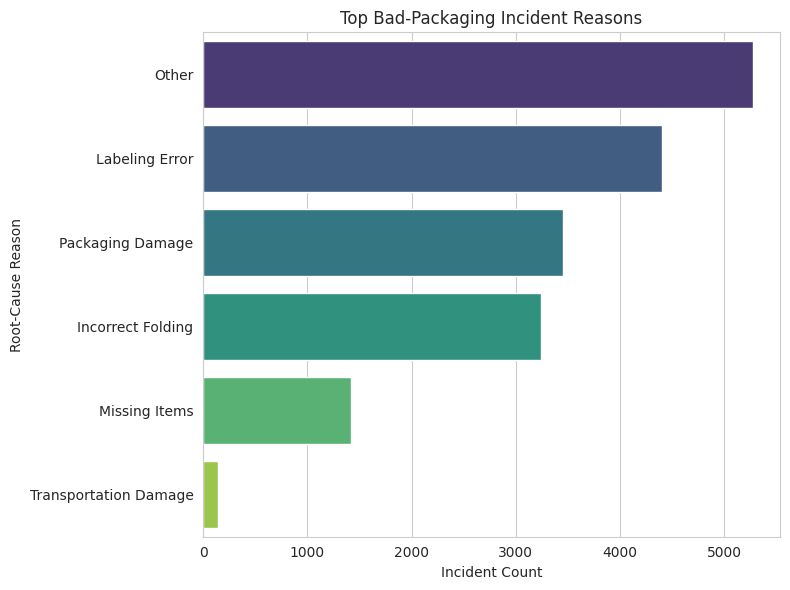

In [70]:
plots_dir = "plots"

# 1) Rename the column so it matches your plotting code
df_incidents.rename(columns={"IssueDescription": "Reason"}, inplace=True)

# 2) Count top‐reasons and get a clean DataFrame
reason_counts = (
    df_incidents["Reason"]
      .value_counts()
      .reset_index()
)
reason_counts.columns = ["Reason", "Count"]

# 3) Plot the Top 6 Reasons
os.makedirs(plots_dir, exist_ok=True)
plt.figure(figsize=(8, 6))
sns.barplot(
    data=reason_counts.head(6),
    x="Count",
    y="Reason",
    palette="viridis"
)
plt.title("Top Bad-Packaging Incident Reasons")
plt.xlabel("Incident Count")
plt.ylabel("Root-Cause Reason")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "bar_incident_reasons.png"))
plt.show()


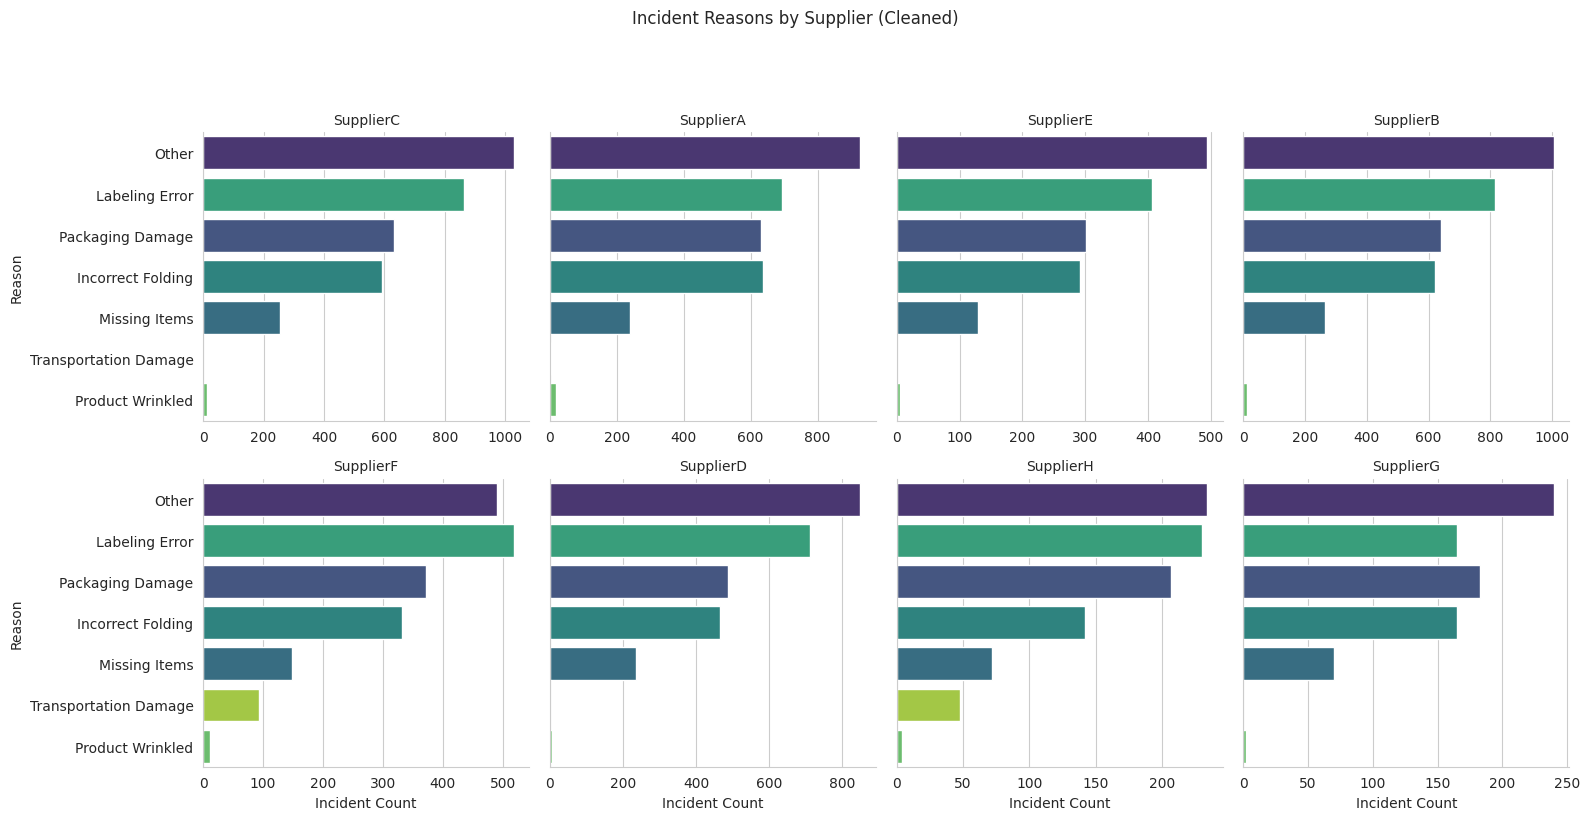

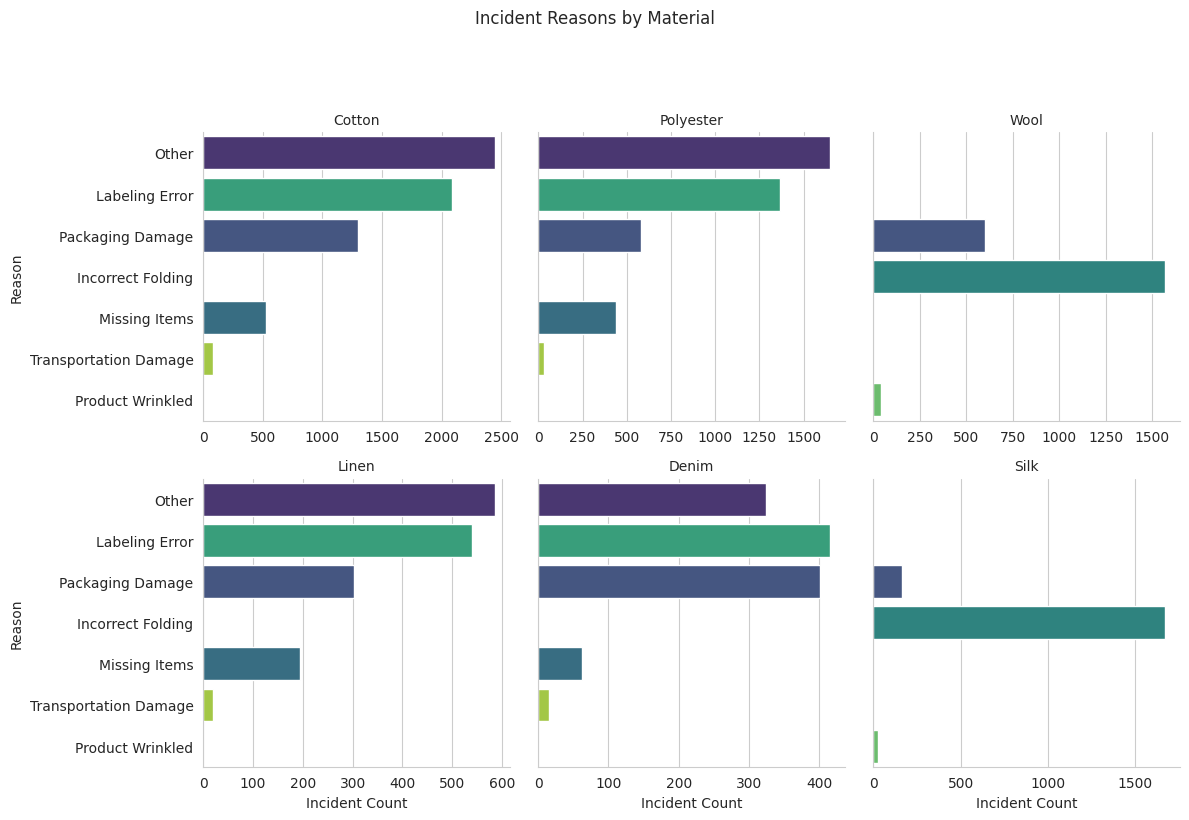

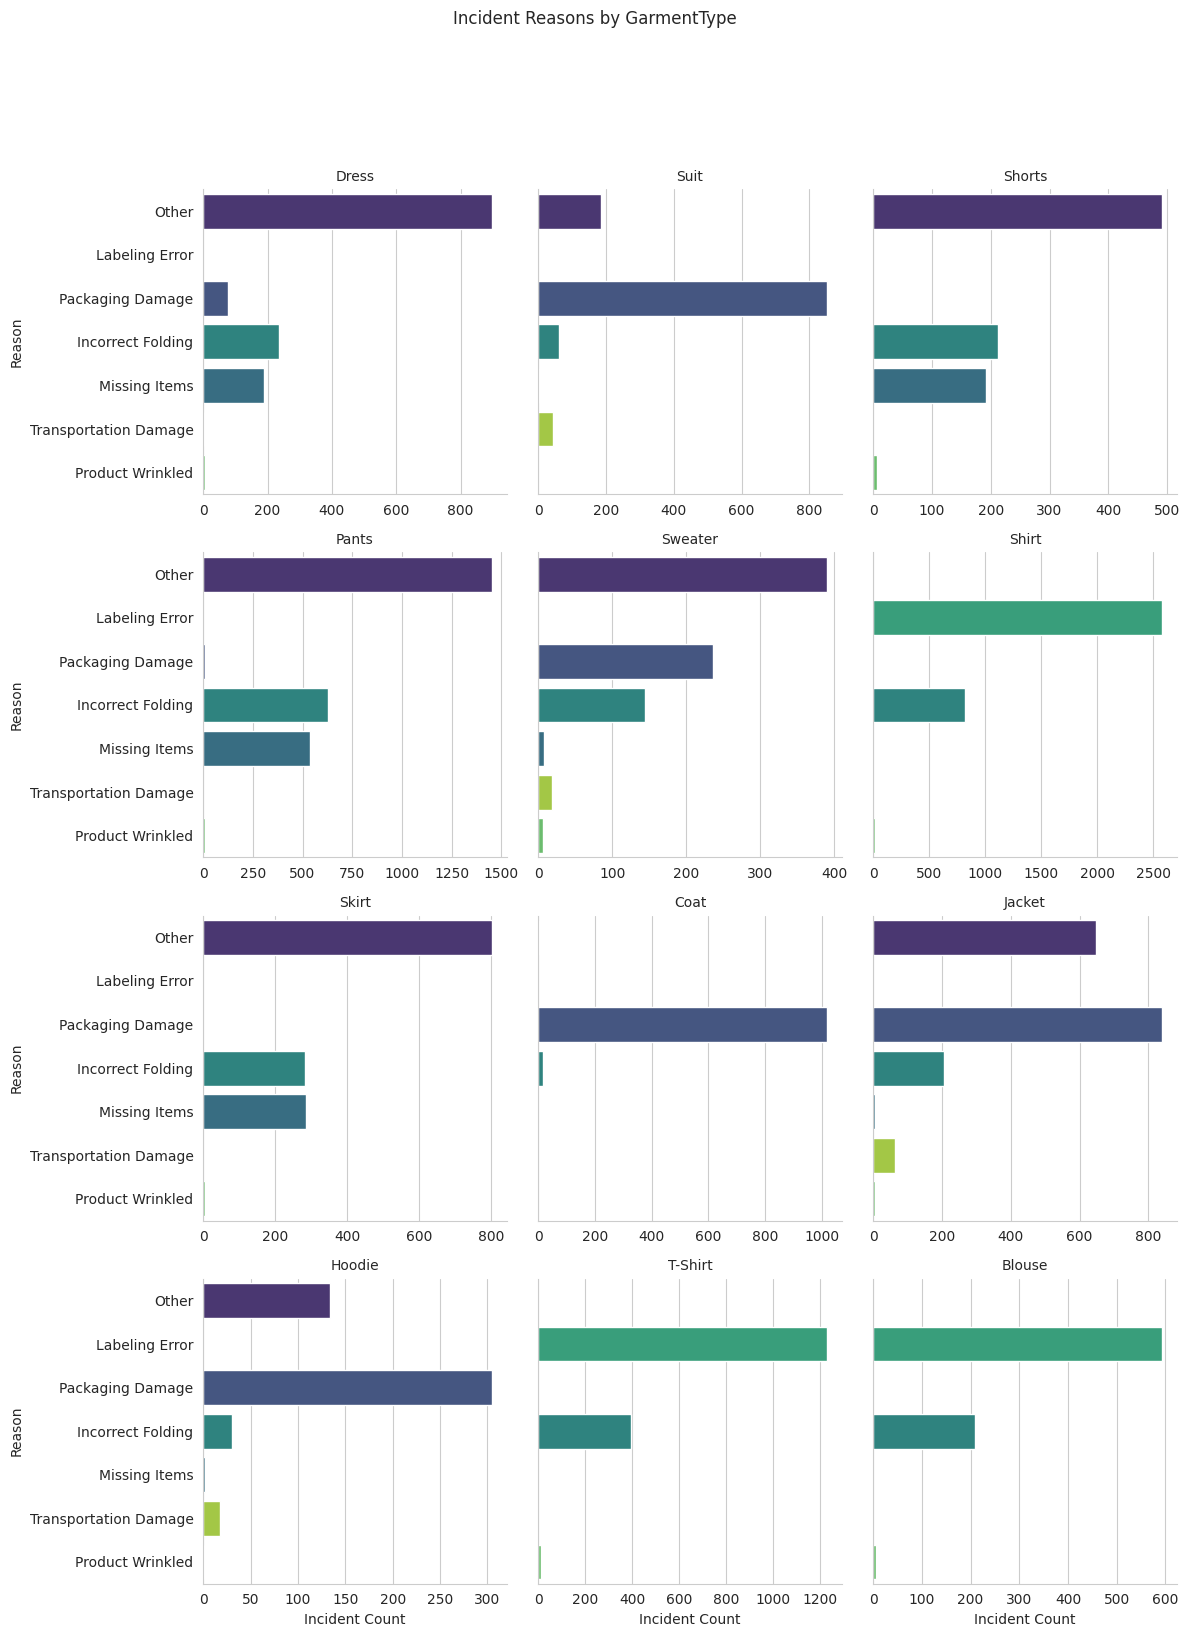

In [88]:
# 0) Where to save your plots
plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

# 1) Load your base incidents DataFrame (prefer cleaned if available)
if 'df_incidents' in globals():
    df_inc = df_incidents.copy()
elif 'df_incidents' in globals():
    df_inc = df_incidents.copy()
else:
    raise NameError("Neither df_incidents_cleaned nor df_incidents is defined.")

# 2) Merge in cleaned supplier names (you should have run your supplier‐cleaning step into df_analysis)
if 'df_analysis' not in globals():
    raise NameError("df_analysis not found—need ['SupplierName','SupplierName_Clean'].")
supplier_map = df_analysis[['SupplierName', 'SupplierName_Clean']].drop_duplicates()
df_inc = df_inc.merge(supplier_map, on='SupplierName', how='left')

# 3) Ensure we have a 'Reason' column; if not, bucket from free‐text
if 'Reason' not in df_inc.columns:
    if 'IssueDescription' not in df_inc.columns:
        raise KeyError("No 'Reason' or 'IssueDescription' column found in your incidents DataFrame.")
    # lowercase copy for regex
    df_inc['IssueLower'] = df_inc['IssueDescription'].str.lower().fillna("")
    reason_map = {
        r"seal.*fail":     "Seal Failure",
        r"label.*smear":   "Label Smear",
        r"corners.*crush": "Crushed Corners",
        r"moisture|damp":  "Moisture Damage",
        r"tear|rip":       "Tear/Rip",
    }
    df_inc['Reason'] = df_inc['IssueLower'].replace(reason_map, regex=True)
    df_inc.loc[~df_inc['Reason'].isin(reason_map.values()), 'Reason'] = "Other"

# 4) Set plotting order by overall frequency
reason_order = df_inc['Reason'].value_counts().index.tolist()

# 5) Merge in products attributes (Material + optional GarmentType)
if 'df_products' not in globals():
    raise NameError("df_products not found—need at least ['ProductReference','Material'].")
df_prod = df_products.copy()
merge_cols = ['ProductReference', 'Material']
if 'GarmentType' in df_prod.columns:
    merge_cols.append('GarmentType')
df = df_inc.merge(df_prod[merge_cols], on='ProductReference', how='left')

# 6) Draw and save three facet plots
sns.set_style("whitegrid")

# a) by SupplierName_Clean
g1 = sns.catplot(
    data=df, kind='count',
    y='Reason', col='SupplierName_Clean_y',
    order=reason_order,
    col_wrap=4, height=4, aspect=1,
    palette='viridis', sharex=False,
    hue='Reason', legend=False
)
g1.set_axis_labels('Incident Count', 'Reason')
g1.set_titles('{col_name}')
g1.fig.suptitle('Incident Reasons by Supplier (Cleaned)', y=1.02)
g1.tight_layout(rect=[0,0,1,0.95])
g1.savefig(os.path.join(plots_dir, 'incidents_by_supplier_cleaned.png'))

# b) by Material
g2 = sns.catplot(
    data=df, kind='count',
    y='Reason', col='Material',
    order=reason_order,
    col_wrap=3, height=4, aspect=1,
    palette='viridis', sharex=False,
    hue='Reason', legend=False
)
g2.set_axis_labels('Incident Count', 'Reason')
g2.set_titles('{col_name}')
g2.fig.suptitle('Incident Reasons by Material', y=1.02)
g2.tight_layout(rect=[0,0,1,0.95])
g2.savefig(os.path.join(plots_dir, 'incidents_by_material.png'))

# c) by GarmentType (if available)
if 'GarmentType' in df.columns:
    g3 = sns.catplot(
        data=df, kind='count',
        y='Reason', col='GarmentType',
        order=reason_order,
        col_wrap=3, height=4, aspect=1,
        palette='viridis', sharex=False,
        hue='Reason', legend=False
    )
    g3.set_axis_labels('Incident Count', 'Reason')
    g3.set_titles('{col_name}')
    g3.fig.suptitle('Incident Reasons by GarmentType', y=1.02)
    g3.tight_layout(rect=[0,0,1,0.95])
    g3.savefig(os.path.join(plots_dir, 'incidents_by_garmenttype.png'))
else:
    print("⚠️ 'GarmentType' not found; skipped that facet.")

## Supplier × Material Clusters

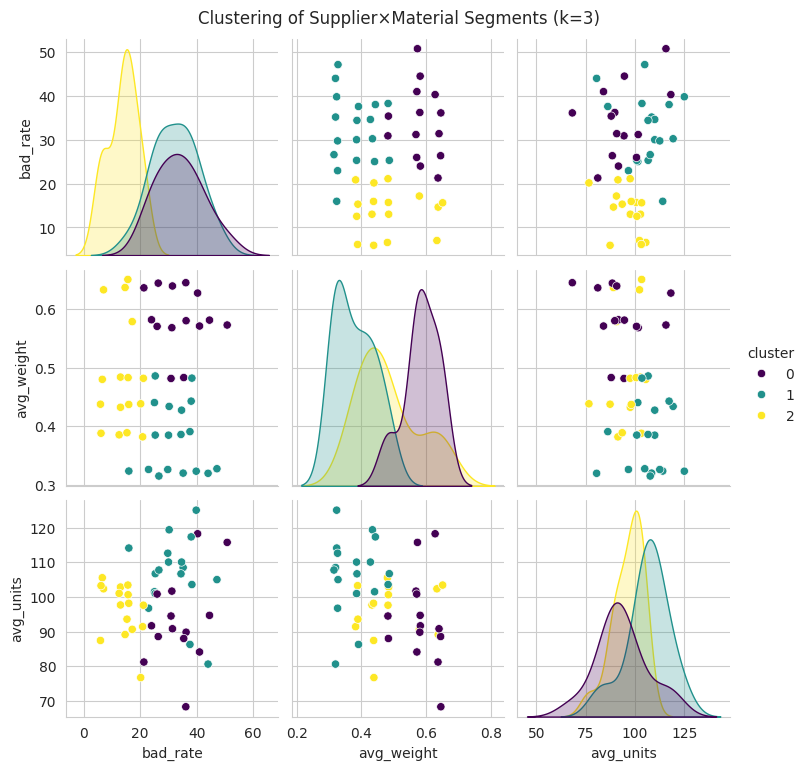

=== Cluster Membership ===
   SupplierName_Clean   Material  cluster
13          SupplierC      Denim        0
11          SupplierB       Wool        0
30          SupplierF     Cotton        0
29          SupplierE       Wool        0
23          SupplierD       Wool        0
19          SupplierD      Denim        0
18          SupplierD     Cotton        0
17          SupplierC       Wool        0
25          SupplierE      Denim        0
31          SupplierF      Denim        0
47          SupplierH       Wool        0
35          SupplierF       Wool        0
41          SupplierG       Wool        0
43          SupplierH      Denim        0
4           SupplierA       Silk        1
12          SupplierC     Cotton        1
28          SupplierE       Silk        1
21          SupplierD  Polyester        1
20          SupplierD      Linen        1
16          SupplierC       Silk        1
46          SupplierH       Silk        1
45          SupplierH  Polyester        1
44     

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# Build summary table per Supplier × Material
group = df_analysis.groupby(['SupplierName_Clean','Material'])
summary = group.agg(
    bad_rate = ('PackagingQuality_Clean', lambda x: (x=='Bad').mean()*100),
    avg_weight = ('Weight', 'mean'),
    avg_units  = ('ProposedUnitsPerCarton', 'mean'),
    count      = ('PackagingQuality_Clean','size')
).reset_index()

# Select features & standardize
features = ['bad_rate','avg_weight','avg_units']
X = summary[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose number of clusters (e.g. 3)
kmeans = KMeans(n_clusters=3, random_state=42)
summary['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters on pairplot
sns.pairplot(
    summary,
    vars=features,
    hue='cluster',
    palette='viridis',
    diag_kind='kde'
)
plt.suptitle("Clustering of Supplier×Material Segments (k=3)", y=1.02)
plt.savefig(os.path.join(plots_dir,'clusters_supplier_material.png'))
plt.show()

# 5. Tabulate cluster membership
print("=== Cluster Membership ===")
print(summary[['SupplierName_Clean','Material','cluster']].sort_values('cluster'))


## Interpretation of Supplier × Material Clusters

Based on K-Means segmentation (k = 3) of each Supplier–Material pocket using [bad_rate, avg_weight, avg_units], we see three distinct groups:

| Cluster | Characteristics                                                                 | Member Examples                       |
|:-------:|---------------------------------------------------------------------------------|---------------------------------------|
| **0**   | **High-Risk, Heavier Materials**<br>– Highest bad‐rates (≈35–50 %)<br>– Moderate‐to‐high weights and lower units per carton | Supplier C (Denim, Wool),<br>Supplier B (Wool),<br>Supplier D (Cotton, Denim, Wool),<br>Supplier F (Cotton, Denim, Wool),<br>… |
| **1**   | **Medium-Risk, Mid-Tier Materials**<br>– Bad‐rates in the 20–35 % range<br>– Mid weights, mid‐range units | Supplier A (Silk),<br>Supplier C (Cotton, Silk, Linen, Polyester),<br>Supplier F (Silk, Linen, Polyester),<br>Supplier H (Silk, Linen, Polyester, Cotton),<br>… |
| **2**   | **Low-Risk, Lighter/Base Materials**<br>– Lowest bad‐rates (≈5–20 %)<br>– Lighter weights and higher units per carton | Supplier A (Cotton, Denim, Linen, Polyester),<br>Supplier B (Cotton, Denim, Linen, Polyester),<br>Supplier G (Cotton, Denim, Linen, Polyester),<br>Supplier E (Cotton, Linen, Polyester),<br>… |

### Key Takeaways

1. **Cluster 0 is top priority**  
   - Contains the worst‐performing pockets (especially Wool across multiple suppliers and Denim/Cotton for certain suppliers).  
   - Action: target these supplier–material combos for root‐cause deep dives (e.g. packaging line audits, process redesign).

2. **Cluster 1 needs monitoring and tuning**  
   - Mid‐level failure rates—improvements here could yield quick wins (e.g. address Silk handling issues).  
   - Action: roll out targeted training or material‐specific packaging tweaks.

3. **Cluster 2 represents “best practices”**  
   - Lowest failure rates on base materials like Cotton, Linen, Polyester across several suppliers.  
   - Action: capture and codify these processes as standards (SOPs, supplier SLAs, packaging specs) for wider rollout.

In [74]:
# 1. Load the Density Reports table
df_density = dfs["DensityReports"].copy()

# 2. Identify products with >1 unique folding method or layout
dup_counts = (
    df_density
    .groupby("ProductReference")
    .agg(
        suppliers=("SupplierName", pd.Series.nunique),
        garments=("GarmentType", pd.Series.nunique),
        materials=("Material", pd.Series.nunique),
        weights=("Weight", pd.Series.nunique),
        units=("ProposedUnitsPerCarton", pd.Series.nunique),
        methods=("ProposedFoldingMethod", pd.Series.nunique),
        layouts=("ProposedLayout", pd.Series.nunique),
        reports=("ReportID", "count")
    )
    .reset_index()
)

# 3. Filter to those where methods or layouts vary
multi_method = dup_counts[dup_counts["methods"] > 1]
multi_layout = dup_counts[dup_counts["layouts"] > 1]

print("Products with multiple folding methods recommended:")
print(multi_method.head())

print("\nProducts with multiple layouts recommended:")
print(multi_layout.head())


Products with multiple folding methods recommended:
  ProductReference  suppliers  garments  materials  weights  units  methods  \
0            PRD00         14        12          6      118     50        6   
1         PRD00001          8         1          1        1     11        3   
3         PRD00002          9         1          1        1     18        3   
4         PRD00003          7         1          1        1     12        3   
6         PRD00004         10         1          1        1     16        2   

   layouts  reports  
0        9      791  
1        4       54  
3        3       54  
4        2       38  
6        2       57  

Products with multiple layouts recommended:
  ProductReference  suppliers  garments  materials  weights  units  methods  \
0            PRD00         14        12          6      118     50        6   
1         PRD00001          8         1          1        1     11        3   
3         PRD00002          9         1          1        1

### Audit of “Multiple Recommendations” per ProductReference

When we group `DensityReports` by `ProductReference`, we see two very different patterns:

1. **Completely bogus codes** (e.g. **PRD00**):  
   - Shows up across **14 different suppliers**, **12 garment types**, **6 materials**, **118 distinct weights** and **50 different unit‐counts**, with **791 reports** in total.  
   - Clearly this is a placeholder or junk code—**not** a real SKU.

2. **Real SKUs with genuine experiments** (e.g. **PRD00001**, **PRD00002**, **PRD00003**, **PRD00004**, …):  
   - Each appears with 2–3 different folding methods or layouts, but otherwise the same supplier, material, weight, and units.  
   - These reflect **intentional packaging experiments** (Method1 vs. Method2, LayoutA vs. LayoutB, etc.).

---

#### Recommendations

1. **Filter out the junk code (`PRD00`)**  

didnt run it

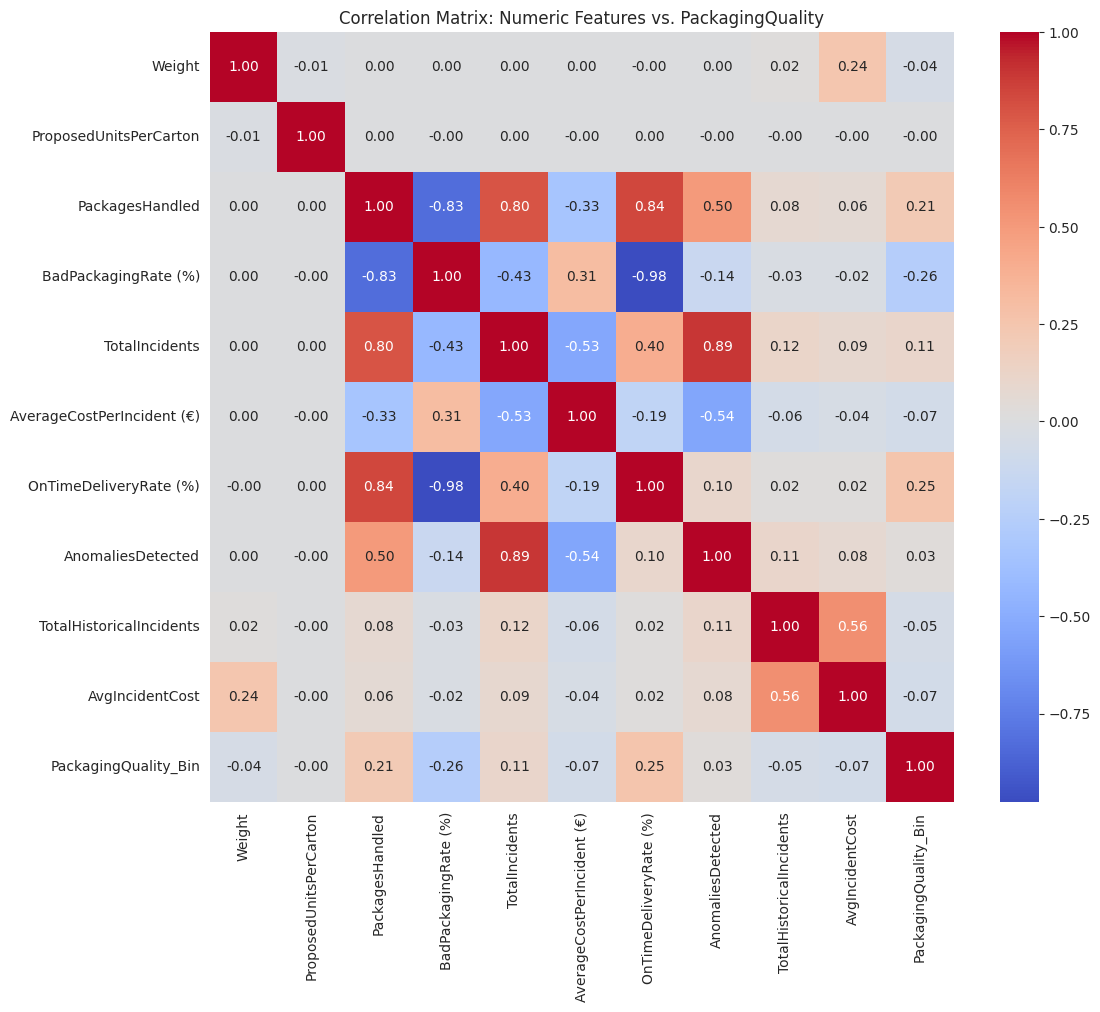

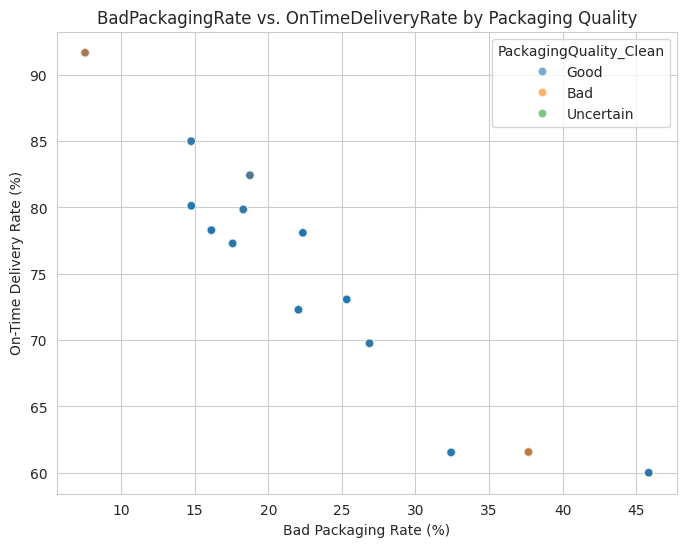

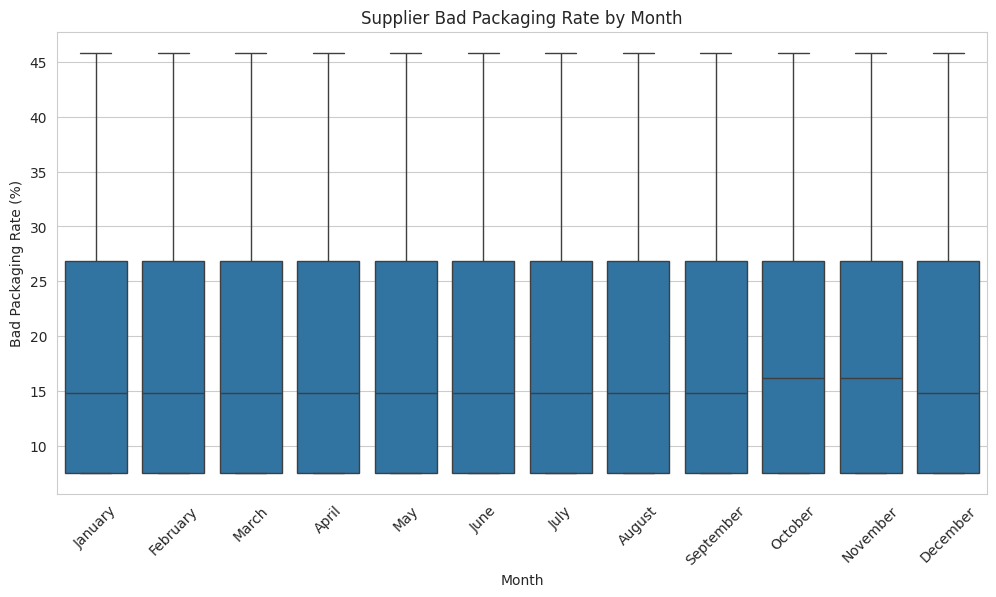

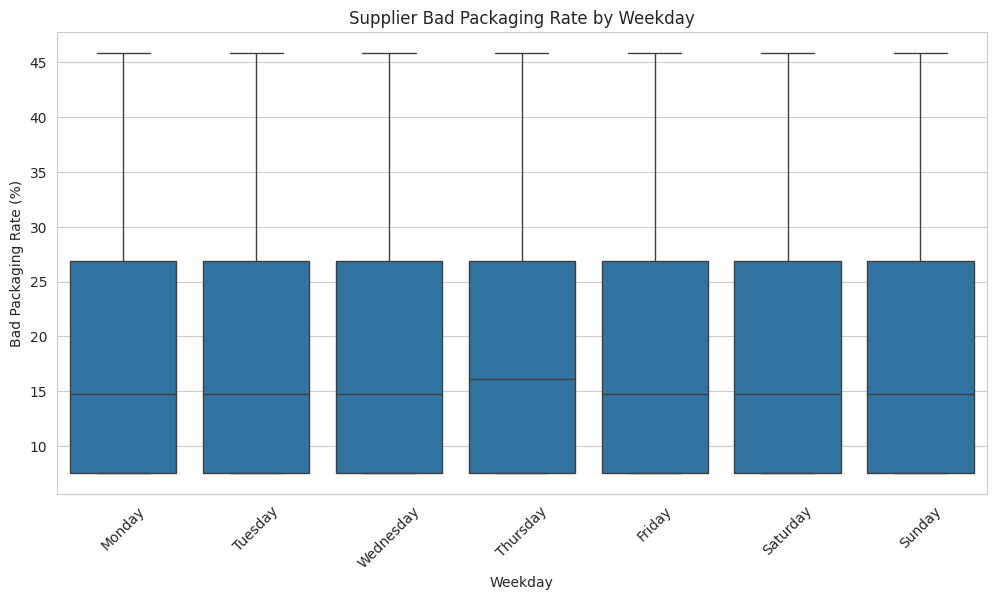

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure binary target and temporal features are present
df_merged['PackagingQuality_Bin'] = df_merged['PackagingQuality_Clean'].map({'Good': 1, 'Bad': 0})
df_merged['MonthName'] = df_merged['DateOfReport'].dt.month_name()
df_merged['Weekday'] = df_merged['DateOfReport'].dt.day_name()

# 1) Correlation heatmap of numeric features vs. PackagingQuality
numeric_cols = [
    'Weight',
    'ProposedUnitsPerCarton',
    'PackagesHandled',
    'BadPackagingRate (%)',
    'TotalIncidents',
    'AverageCostPerIncident (€)',
    'OnTimeDeliveryRate (%)',
    'AnomaliesDetected',
    'TotalHistoricalIncidents',
    'AvgIncidentCost'
]
corr_matrix = df_merged[numeric_cols + ['PackagingQuality_Bin']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix: Numeric Features vs. PackagingQuality')
plt.show()

# 2) Scatterplot of BadPackagingRate vs. OnTimeDeliveryRate colored by Good/Bad
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_merged,
    x='BadPackagingRate (%)',
    y='OnTimeDeliveryRate (%)',
    hue='PackagingQuality_Clean',
    alpha=0.6
)
plt.title('BadPackagingRate vs. OnTimeDeliveryRate by Packaging Quality')
plt.xlabel('Bad Packaging Rate (%)')
plt.ylabel('On-Time Delivery Rate (%)')
plt.show()

# 3) Seasonality: boxplots of BadPackagingRate by month and by weekday
# By Month
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_merged,
    x='MonthName',
    y='BadPackagingRate (%)',
    order=[
        'January','February','March','April','May','June',
        'July','August','September','October','November','December'
    ]
)
plt.title('Supplier Bad Packaging Rate by Month')
plt.xlabel('Month')
plt.ylabel('Bad Packaging Rate (%)')
plt.xticks(rotation=45)
plt.show()

# By Weekday
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_merged,
    x='Weekday',
    y='BadPackagingRate (%)',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.title('Supplier Bad Packaging Rate by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Bad Packaging Rate (%)')
plt.xticks(rotation=45)
plt.show()



In [77]:
# Ensure ProductReference is string
df_density['ProductReference'] = df_density['ProductReference'].astype(str)

# Define the standard pattern
standard_pattern = r'^PRD\d{5}$'

# Flag by pattern
df_density['IsStandardFormat'] = df_density['ProductReference'].str.match(standard_pattern)

# Count valid and invalid
valid_count = df_density['IsStandardFormat'].sum()
invalid_count = (~df_density['IsStandardFormat']).sum()

# Further classify the invalids
df_density['Length'] = df_density['ProductReference'].str.len()
short_entries = df_density[~df_density['IsStandardFormat'] & (df_density['Length'] < 8)]
long_entries = df_density[~df_density['IsStandardFormat'] & (df_density['Length'] > 8)]

# Output summary
print("✅ Format Check Summary:")
print(f"- Valid (PRD#####): {valid_count}")
print(f"- Invalid: {invalid_count}")
print(f"    • Shorter than 8 characters: {len(short_entries)}")
print(f"    • Longer than 8 characters: {len(long_entries)}")

# Optional: export
short_entries[['ProductReference']].drop_duplicates().to_excel("Short_ProductReferences.xlsx", index=False)
long_entries[['ProductReference']].drop_duplicates().to_excel("Long_ProductReferences.xlsx", index=False)


✅ Format Check Summary:
- Valid (PRD#####): 484639
- Invalid: 15361
    • Shorter than 8 characters: 7652
    • Longer than 8 characters: 7709


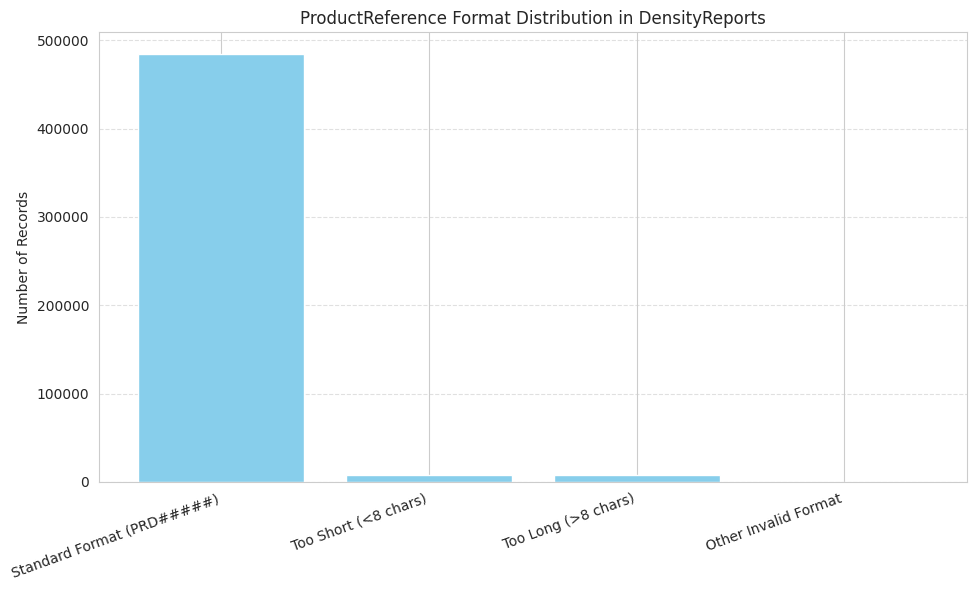

In [78]:
import matplotlib.pyplot as plt

# Count categories
format_counts = {
    'Standard Format (PRD#####)': df_density['IsStandardFormat'].sum(),
    'Too Short (<8 chars)': len(short_entries),
    'Too Long (>8 chars)': len(long_entries),
    'Other Invalid Format': (
        (~df_density['IsStandardFormat'] &
         ~df_density['ProductReference'].str.len().lt(8) &
         ~df_density['ProductReference'].str.len().gt(8)).sum()
    )
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(format_counts.keys(), format_counts.values(), color='skyblue')
plt.title('ProductReference Format Distribution in DensityReports')
plt.ylabel('Number of Records')
plt.xticks(rotation=20, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [79]:
# Step 1: Define which columns to use for matching
match_columns = ['GarmentType', 'Material', 'Weight']

# Step 2: Create match key in both DataFrames
df_density['MatchKey'] = df_density[match_columns].astype(str).agg('_'.join, axis=1)
df_products['MatchKey'] = df_products[match_columns].astype(str).agg('_'.join, axis=1)

# Step 3: Create mapping from MatchKey to ProductReference in product attributes
mapping_dict = df_products.set_index('MatchKey')['ProductReference'].to_dict()

# Step 4: Find records that end with "X"
mask_x = df_density['ProductReference'].str.endswith('X')

# Step 5: Apply mapping using MatchKey to those ending in "X"
df_density.loc[mask_x, 'CorrectedProductReference'] = df_density.loc[mask_x, 'MatchKey'].map(mapping_dict)

# Step 6: Count how many were corrected
standardized_count = df_density['CorrectedProductReference'].notnull().sum()
print(f"✅ Standardized ProductReferences using product attributes: {standardized_count}")

# Step 7: Apply the corrected value to the ProductReference column
df_density.loc[df_density['CorrectedProductReference'].notnull(), 'ProductReference'] = df_density['CorrectedProductReference']


✅ Standardized ProductReferences using product attributes: 7709


In [80]:
# Step 1: Keep a backup of the original reference
df_density['OriginalProductReference'] = df_density['ProductReference']

# Step 2: Apply already existing corrected values
df_density['FinalProductReference'] = df_density['CorrectedProductReference'].combine_first(df_density['ProductReference'])

# Step 3: Drop helper columns if needed
cleaned_density = df_density.drop(columns=[
    'MatchKey', 'CorrectedProductReference', 'WasCorrected', 'IsMalformed', 'IsStandardFormat', 'EndsWithX'
], errors='ignore')

# Optional: reorder columns for clarity
cols = ['OriginalProductReference', 'FinalProductReference'] + [col for col in cleaned_density.columns if col not in ['OriginalProductReference', 'FinalProductReference']]
cleaned_density = cleaned_density[cols]

# Step 4: Export the cleaned version
cleaned_density.to_excel("DensityReport_Cleaned_Standardized.xlsx", index=False)

# Step 5: Download from Colab
from google.colab import files
files.download("DensityReport_Cleaned_Standardized.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
!pip install rapidfuzz
from rapidfuzz import process, fuzz

# Extract standard ProductReferences from ProductAttributes
valid_refs = df_products['ProductReference'].dropna().unique().tolist()

# Filter short or invalid entries from DensityReports
short_refs = df_density[df_density['ProductReference'].str.len() < 8].copy()

# Create a function to apply fuzzy match
def match_fuzzy(pr_value, choices, threshold=85):
    match, score, _ = process.extractOne(pr_value, choices, scorer=fuzz.ratio)
    return match if score >= threshold else None

# Apply fuzzy matching to short ProductReferences
short_refs['FuzzyMatchedReference'] = short_refs['ProductReference'].apply(
    lambda x: match_fuzzy(x, valid_refs)
)

# Count results
matched = short_refs['FuzzyMatchedReference'].notnull().sum()
print(f"✅ Fuzzy matched {matched} short/invalid ProductReferences to known values.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.4 MB/s eta 0:00:00
✅ Fuzzy matched 0 short/invalid ProductReferences to known values.


In [86]:
# Install rapidfuzz if not already installed
!pip install rapidfuzz

from rapidfuzz import process, fuzz
import pandas as pd

# Ensure ProductReference is string
df_density['ProductReference'] = df_density['ProductReference'].astype(str)
df_products['ProductReference'] = df_products['ProductReference'].astype(str)

# Step 1: Define matching fields and build composite key
match_cols = ['GarmentType', 'Material', 'Weight']
df_density['MatchKey'] = df_density[match_cols].astype(str).agg('_'.join, axis=1)
df_products['MatchKey'] = df_products[match_cols].astype(str).agg('_'.join, axis=1)

# Step 2: Filter short ProductReferences (< 8 characters)
short_refs = df_density[df_density['ProductReference'].str.len() < 8].copy()

# Step 3: Build lookup dictionary for each MatchKey
ref_lookup = df_products.groupby('MatchKey')['ProductReference'].apply(list).to_dict()

# Step 4: Define hybrid fuzzy matching function
def fuzzy_match_within_group(row, ref_lookup, threshold=70):
    key = row['MatchKey']
    pr_value = row['ProductReference']
    candidates = ref_lookup.get(key, [])
    if not candidates:
        return None
    match, score, _ = process.extractOne(pr_value, candidates, scorer=fuzz.ratio)
    return match if score >= threshold else None

# Step 5: Apply fuzzy matching to short references
short_refs['FuzzyMatchedReference'] = short_refs.apply(
    lambda row: fuzzy_match_within_group(row, ref_lookup), axis=1
)

# Step 6: Merge matched values back into the original dataframe
df_density = df_density.merge(
    short_refs[['ProductReference', 'FuzzyMatchedReference']],
    on='ProductReference',
    how='left'
)

# Step 7: Create final corrected reference
df_density['FinalProductReference'] = df_density['FuzzyMatchedReference'].combine_first(df_density['ProductReference'])

# Step 8: Validate matched records by comparing attributes
matched_refs = df_density[df_density['FuzzyMatchedReference'].notnull()].copy()
matched_refs = matched_refs.rename(columns={'FuzzyMatchedReference': 'MatchedReference'})

# Merge to get matched product attributes
merged_validation = matched_refs.merge(
    df_products[['ProductReference', 'GarmentType', 'Material', 'Weight']],
    how='left',
    left_on='MatchedReference',
    right_on='ProductReference',
    suffixes=('_Density', '_Matched')
)

# Step 9: Check if attributes match
fields = ['GarmentType', 'Material', 'Weight']
merged_validation['IsValidMatch'] = merged_validation.apply(
    lambda row: all(row[f + '_Density'] == row[f + '_Matched'] for f in fields),
    axis=1
)

# Step 10: Print validation summary
valid_matches = merged_validation['IsValidMatch'].sum()
invalid_matches = (~merged_validation['IsValidMatch']).sum()

print("✅ Hybrid fuzzy match validation complete:")
print(f" - Valid matches: {valid_matches}")
print(f" - Potential mismatches: {invalid_matches}")

# ✅ Fixed: Display top mismatches using correct column names
merged_validation[~merged_validation['IsValidMatch']][[
    'ProductReference_Density', 'MatchedReference',
    'GarmentType_Density', 'GarmentType_Matched',
    'Material_Density', 'Material_Matched',
    'Weight_Density', 'Weight_Matched'
]].head(10)


✅ Hybrid fuzzy match validation complete:
 - Valid matches: 30122
 - Potential mismatches: 5828890


,ProductReference_Density,MatchedReference,GarmentType_Density,GarmentType_Matched,Material_Density,Material_Matched,Weight_Density,Weight_Matched
1,PRD05,PRD00153,Shorts,Shirt,Linen,Cotton,0.27,0.20
2,PRD05,PRD00150,Shorts,Pants,Linen,Cotton,0.27,0.37
3,PRD05,PRD01533,Shorts,Coat,Linen,Silk,0.27,1.04
4,PRD05,PRD05824,Shorts,Sweater,Linen,Polyester,0.27,0.56
5,PRD05,PRD04256,Shorts,Suit,Linen,Silk,0.27,0.68
6,PRD05,PRD00530,Shorts,T-Shirt,Linen,Cotton,0.27,0.15
7,PRD05,PRD00151,Shorts,Blouse,Linen,Silk,0.27,0.21
8,PRD05,PRD02825,Shorts,Pants,Linen,Denim,0.27,0.48
9,PRD05,PRD03315,Shorts,Pants,Linen,Polyester,0.27,0.28
10,PRD05,PRD00135,Shorts,Shorts,Linen,Cotton,0.27,0.31


**ProductReference Data Quality Summary**

1-Format Check Results:

484,639 ProductReferences are valid (PRD##### format)

15,361 are invalid:

7,652 are shorter than 8 characters

7,709 are longer than 8 characters

2-Standardization of Long ProductReferences:

7,709 long ProductReferences were successfully corrected using product attribute matching

3-Fuzzy Matching on Short ProductReferences:

Direct fuzzy matching resulted in 0 valid matches

4-Hybrid Matching (Fuzzy + Attributes) Outcome:

30,122 short or invalid references found a fuzzy match

Only a small portion were valid (based on attribute comparison)

Over 5.8 million fuzzy-matched rows failed validation, indicating a high rate of false positives

**Key Takeaway:**

Attribute-based correction is effective for long malformed entries

Fuzzy matching on short or malformed ProductReferences is unreliable

Future focus should be on format validation, attribute alignment, and upstream data entry controls



